In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [68]:
# decide the data to use
USE_SIMPLE_DATA = False



In [126]:
import matplotlib
from matplotlib.font_manager import fontManager
fontManager.addfont('./PingFang Regular.ttf')
matplotlib.rc('font',family = 'PingFang SC')

In [125]:
#from matplotlib.font_manager import fontManager
#for i in sorted(fontManager.get_font_names()):
#   print(i)

.Aqua Kana
.CJK Symbols Fallback HK
.DecoType Nastaleeq Urdu UI
.Keyboard
.New York
.SF Arabic
.SF Arabic Rounded
.SF Armenian
.SF Armenian Rounded
.SF Camera
.SF Compact
.SF Compact Rounded
.SF Georgian
.SF Georgian Rounded
.SF Hebrew
.SF Hebrew Rounded
.SF NS Mono
.SF NS Rounded
.SF Soft Numeric
.ThonburiUI
Academy Engraved LET
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Apple Braille
Apple Chancery
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
Baghdad
Bangla MN
Bangla Sangam MN
Baskerville
Beirut
Big Caslon
Bodoni 72
Bodoni 72 Oldstyle
Bodoni 72 Smallcaps
Bodoni Ornaments
Bradley Hand
Brush Script MT
Chalkboard
Chalkboard SE
Chalkduster
Charter
Cochin
Comic Sans MS
Copperplate
Corsiva Hebrew
Courier
Courier New
DIN Alternate
DIN Condensed
Damascus
DecoType Naskh
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu

# analyze the data after clustering

1. mulinoimal regression
2. explore relationship inside the cluster

## 1. mulinoimal regression

In [71]:
# Load the data
os.chdir('/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes')
df =  pd.read_csv('/processedData/simplify_tsneCluster.csv') if USE_SIMPLE_DATA else pd.read_csv('processedData/raw_tsneCluster.csv')

In [72]:
# cleaning the data
cleaned_df = df[[ '國文檢定_code', '英文檢定_code',
               '數學檢定_code',
               '社會檢定_code', '自然檢定_code', '國文倍率', '英文倍率', '數學倍率', '社會倍率', '自然倍率', '預定甄試人數',
               '甄試費用', '口試佔比', '書審佔比','unitier','cluster']]

In [73]:
# check the size of groups 
cleaned_df['cluster'].value_counts().sort_index()

1    517
2    425
3    238
4    279
5    248
6    107
7    340
Name: cluster, dtype: int64

In [74]:
X = pd.get_dummies(cleaned_df['cluster'])
basegroup = cleaned_df['cluster'].value_counts().sort_index().index.values[ cleaned_df['cluster'].value_counts().sort_index().argmax()]
X = X.drop(basegroup, axis=1).values

In [75]:
# liner regression
from sklearn.linear_model import LinearRegression

Ys = cleaned_df.drop(['cluster'], axis=1).values
intercepts = []
coefficients = []

for i in range(Ys.shape[1]):
    Y = Ys[:,i]
    reg = LinearRegression().fit(X, Y)
    print(cleaned_df.columns[i])
    print(reg.coef_)
    print(reg.intercept_)
    print('---------------------------------')
    intercepts.append(reg.intercept_)
    coefficients.append(reg.coef_)

國文檢定_code
[ 12.52070088  -4.58635795  12.10950965  -3.92767673 -18.65480215
 -13.46576971]
20.851063829787165
---------------------------------
英文檢定_code
[-10.07632268 -13.23346553   4.9088344  -37.63059213 -34.67566297
 -25.55867562]
39.58220502901352
---------------------------------
數學檢定_code
[-29.42090795 -39.70611804   2.33711861 -40.18707494 -15.53384913
 -27.95443736]
40.53384912959366
---------------------------------
社會檢定_code
[30.47538514  0.44714985 -0.43520309  0.96399045 -0.32305356  1.82362043]
0.4352030947775427
---------------------------------
自然檢定_code
[-48.27340994 -48.04651919 -42.99615926 -48.10951051 -47.80776948
 -39.62046877]
48.508704061895656
---------------------------------
國文倍率
[-10.65542155  -8.97685012  -6.38892355 -18.88063502   0.27283573
   5.81516669]
23.890715667311447
---------------------------------
英文倍率
[ 4.5786961  -8.52096777 -4.34412069 16.98428433 17.60928433 17.02840198]
12.390715667311378
---------------------------------
數學倍率
[13.55782455 

In [76]:
# save the coef and intercept by csv
groups = cleaned_df['cluster'].value_counts().sort_index().index.values.tolist()
groups.remove(basegroup)
groups = ['group - ' + str(i) for i in groups]
columns = ['columns',f'intercept(group - {basegroup})']
columns.extend(groups)
params = pd.DataFrame(columns=columns)
for colname,intercep,coef in zip(cleaned_df.columns,intercepts, coefficients):
    params.loc[len(params)] = ([colname,intercep,*coef])
params.to_csv(f'results/multinomial_{"simp" if USE_SIMPLE_DATA else "raw"}.csv') 



## 2. explore relationship inside the cluster

In [77]:
# seperate the data by cluster
clustered_data = {}
for group in cleaned_df['cluster'].value_counts().sort_index().index.values:
    clustered_data[group] = cleaned_df[cleaned_df['cluster'] == group]

In [78]:
# columns needed analyzed
columnlist = ['國文檢定_code', '英文檢定_code','數學檢定_code','社會檢定_code', '自然檢定_code', '國文倍率', '英文倍率', '數學倍率', '社會倍率', '自然倍率']
sieve1 = ['國文檢定_code', '英文檢定_code','數學檢定_code','社會檢定_code', '自然檢定_code']
sieve2 = ['國文倍率', '英文倍率', '數學倍率', '社會倍率', '自然倍率']

In [79]:
# recode sive2 to minus
for col in sieve2:
    for idx,df_ in clustered_data.items():
        df_.loc[:,col] = -df_.loc[:,col]
cleaned_df[sieve2] = -cleaned_df[sieve2]

/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_42520/2462664989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.loc[:,col] = -df_.loc[:,col]
/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_42520/2462664989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[sieve2] = -cleaned_df[sieve2]


In [80]:
"""
from scipy.special import comb
import matplotlib

plt.subplots(int(comb(len(columnlist),2)),len(columnlist),figsize=(15,10),sharex=True,sharey=True)
matplotlib.rc('font',family = 'PingFang HK')
for x in range(len(columnlist)):
    for y in range(len(columnlist)):
        if y <= x :
            continue
        for idx,df_ in enumerate(clustered_data.values()):
            sns.kdeplot(df_, x=columnlist[x],y = columnlist[y], ax = plt.subplot(int(comb(len(columnlist),2)),len(columnlist),idx+1),fill=True,bw_adjust=0.8)
        print(f'{columnlist[x]} vs {columnlist[y]}')
plt.show()
"""

"\nfrom scipy.special import comb\nimport matplotlib\n\nplt.subplots(int(comb(len(columnlist),2)),len(columnlist),figsize=(15,10),sharex=True,sharey=True)\nmatplotlib.rc('font',family = 'PingFang HK')\nfor x in range(len(columnlist)):\n    for y in range(len(columnlist)):\n        if y <= x :\n            continue\n        for idx,df_ in enumerate(clustered_data.values()):\n            sns.kdeplot(df_, x=columnlist[x],y = columnlist[y], ax = plt.subplot(int(comb(len(columnlist),2)),len(columnlist),idx+1),fill=True,bw_adjust=0.8)\n        print(f'{columnlist[x]} vs {columnlist[y]}')\nplt.show()\n"

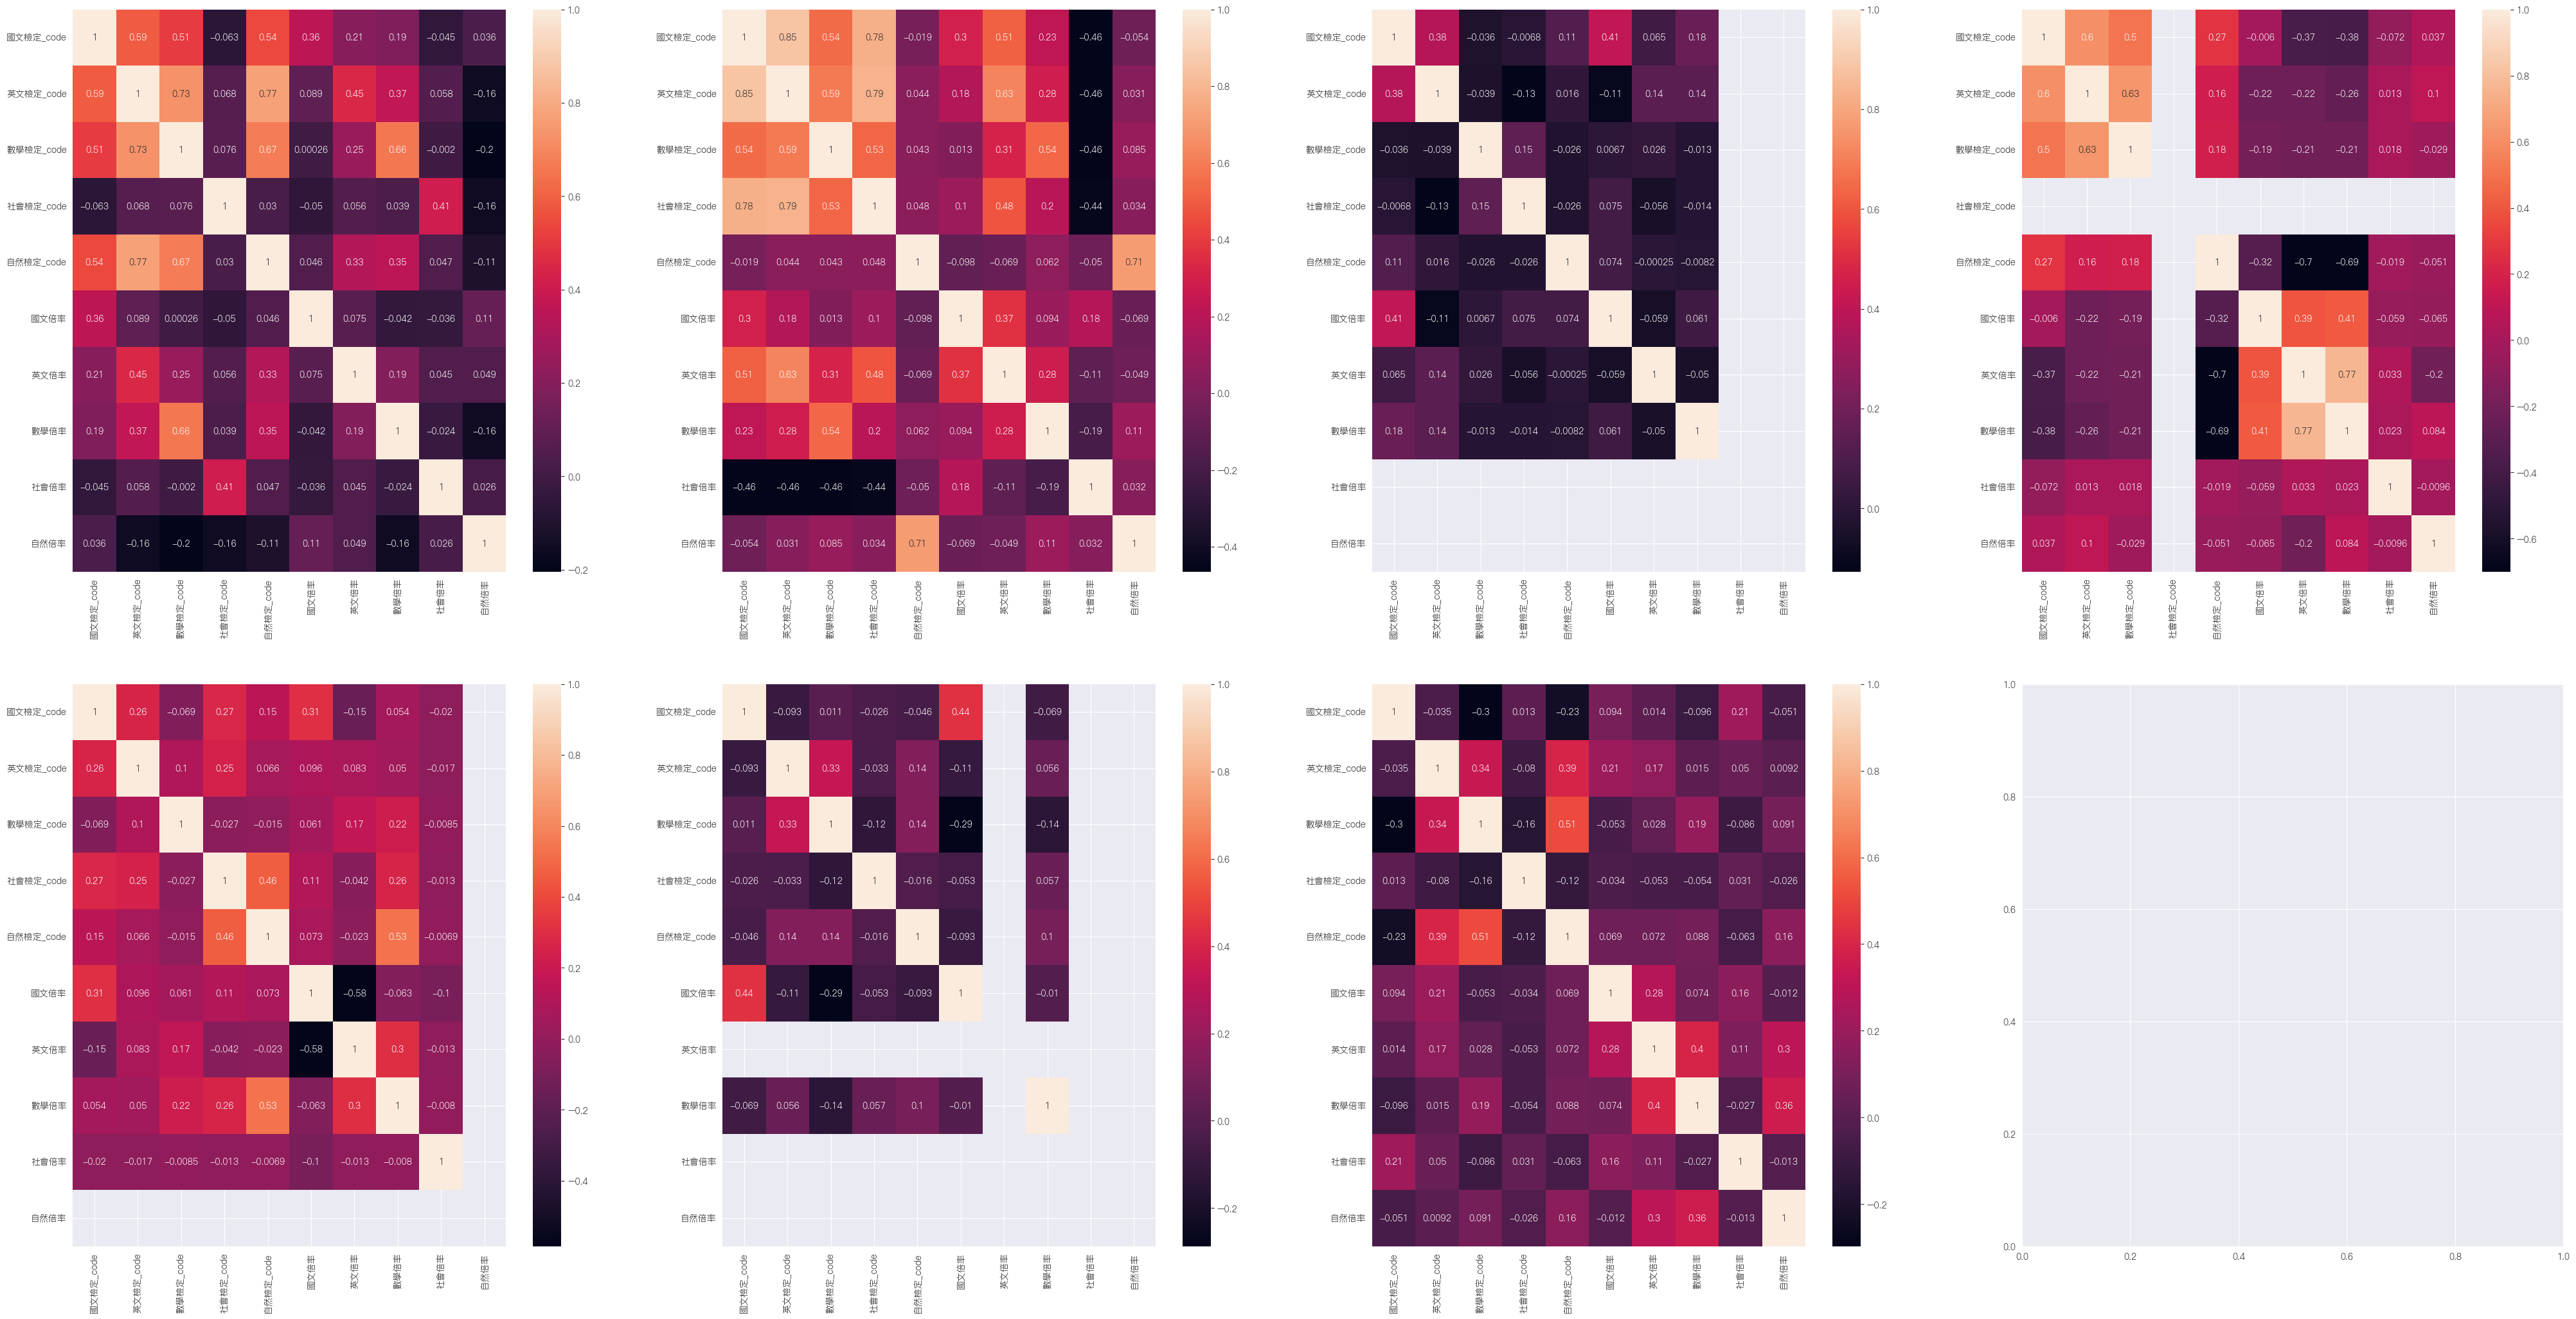

In [127]:
# show the correlation between columns
plt.subplots(2,4,figsize=(50,25))
for idx,df_ in enumerate(clustered_data.values()):
    plt.subplot(2,4,idx+1)
    sns.heatmap(df_[columnlist].corr() ,annot=True)
plt.show()  

/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{

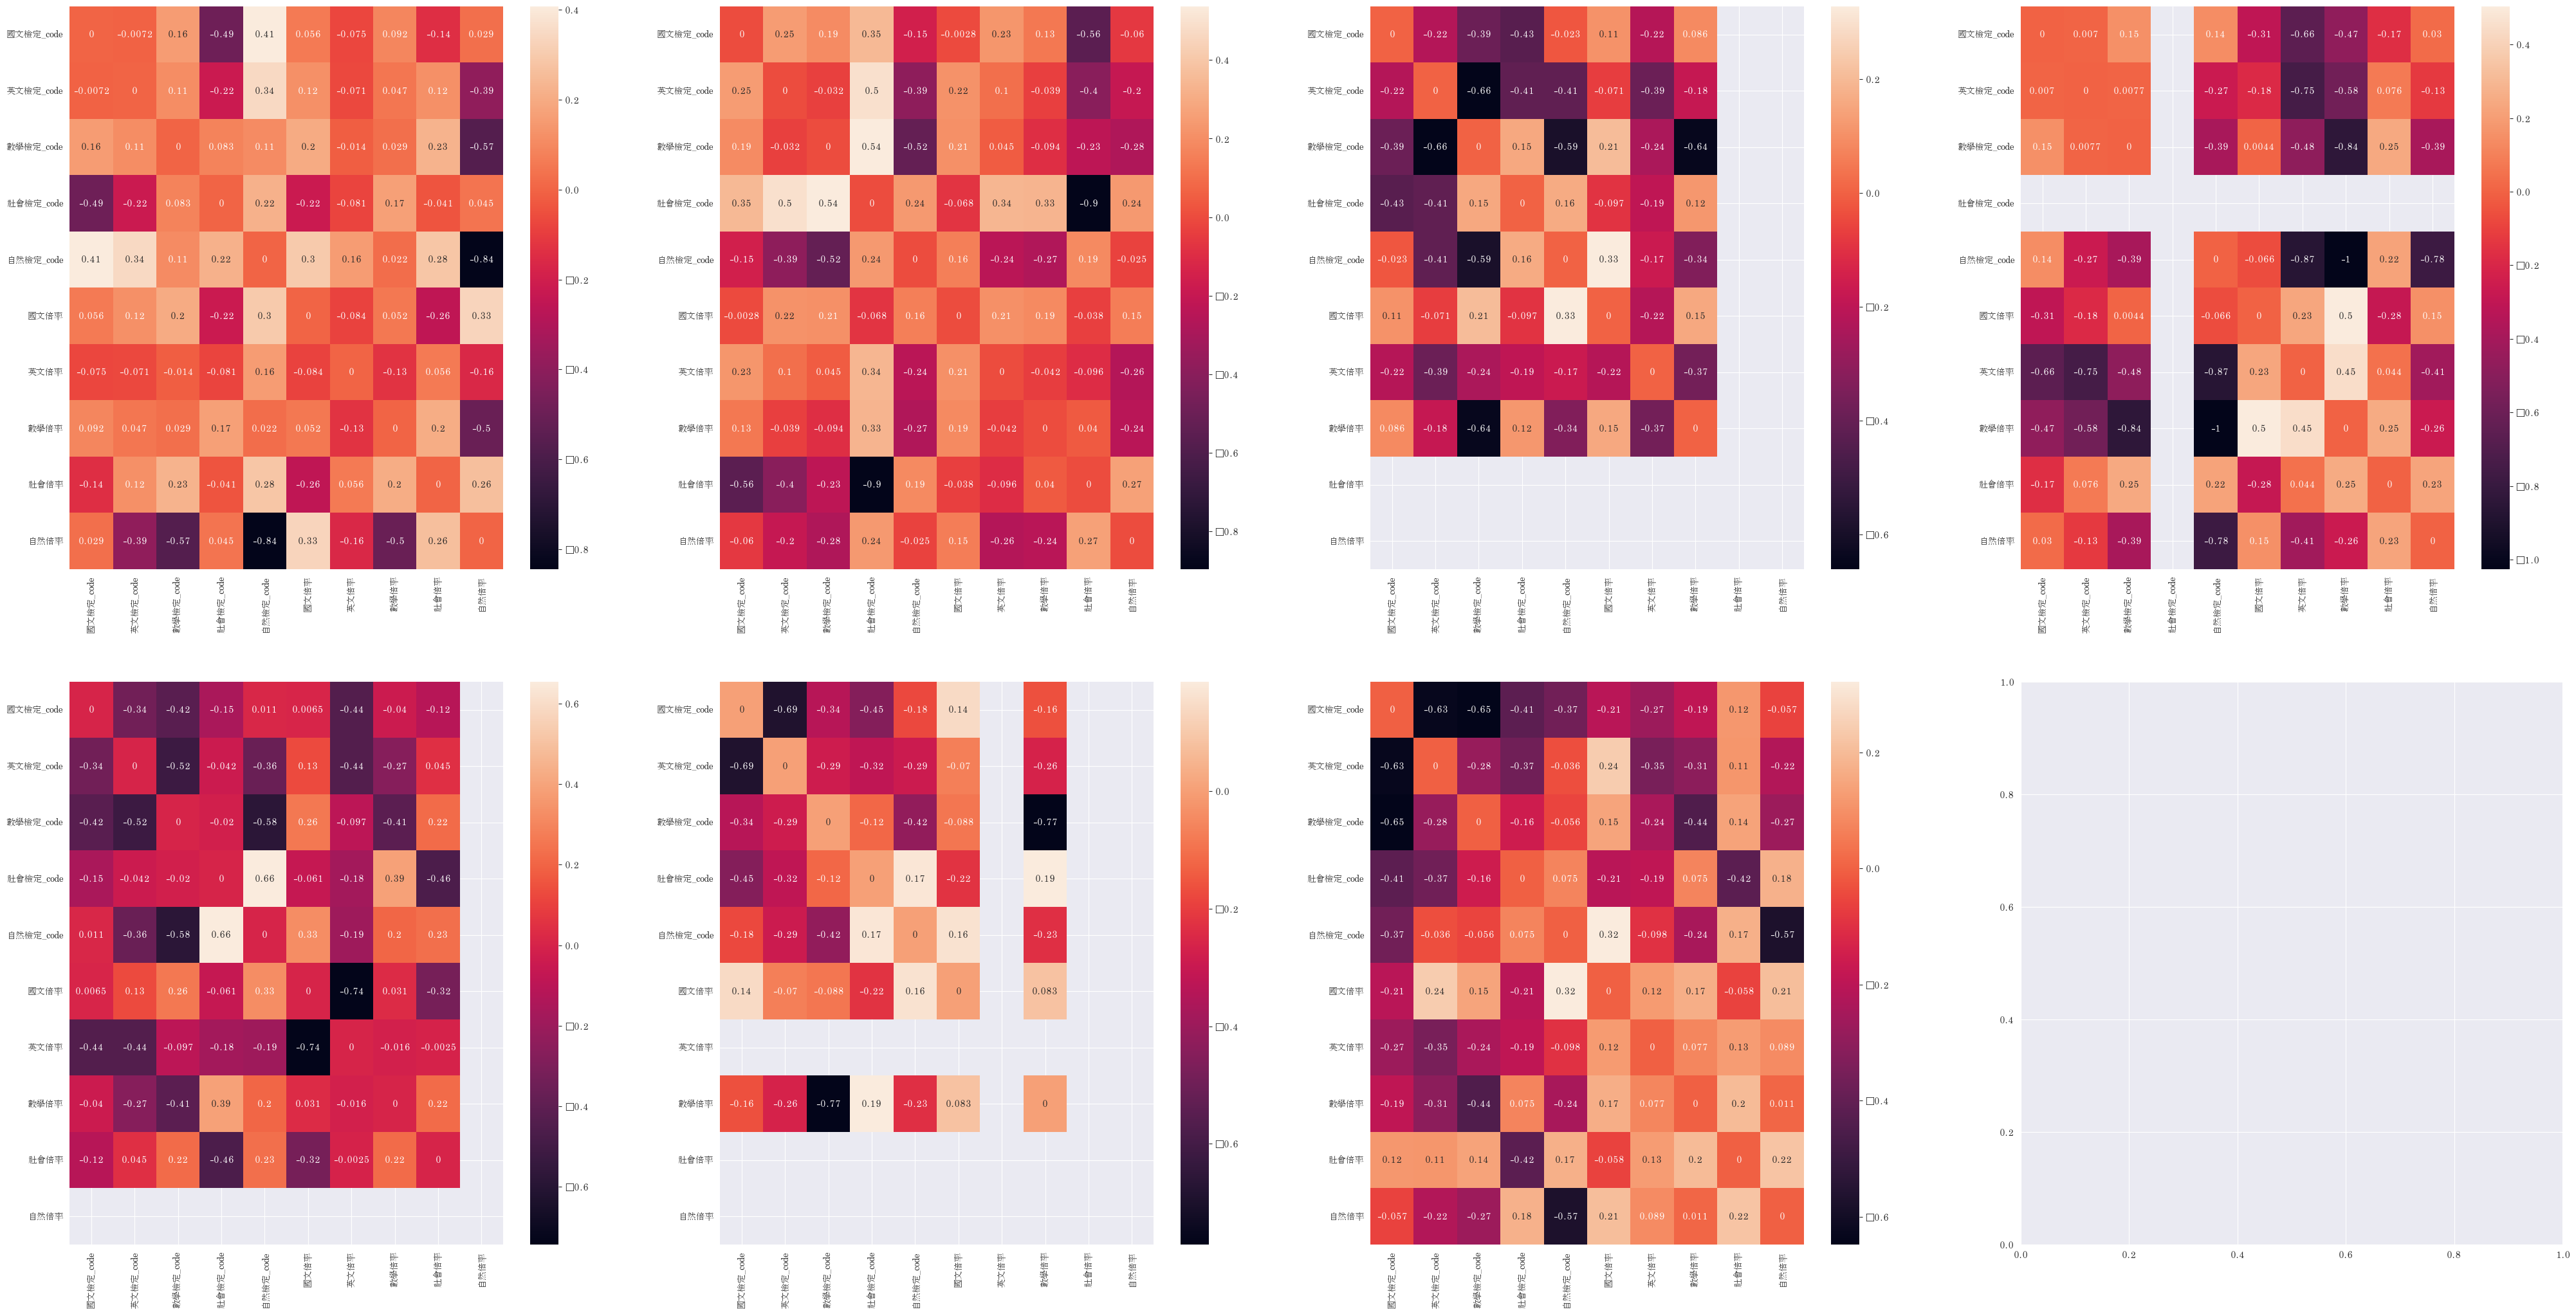

In [82]:
plt.subplots(2,4,figsize=(50,25))
for idx,df_ in enumerate(clustered_data.values()):
    plt.subplot(2,4,idx+1)
    sns.heatmap(df_[columnlist].corr().values - cleaned_df[columnlist].corr() ,annot=True)
plt.show()

/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


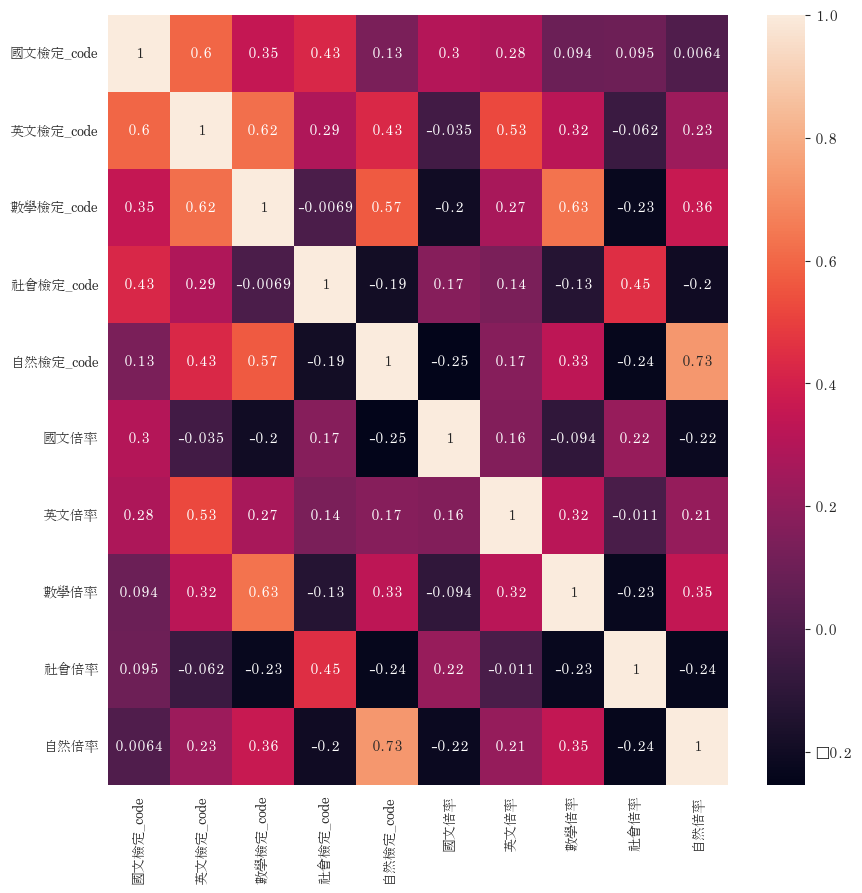

In [83]:
#base line corr
plt.subplots(1,1,figsize=(10,10))
sns.heatmap(cleaned_df[columnlist].corr(),annot=True)

In [84]:
cleaned_df.corr()

,國文檢定_code,英文檢定_code,數學檢定_code,社會檢定_code,自然檢定_code,國文倍率,英文倍率,數學倍率,社會倍率,自然倍率,預定甄試人數,甄試費用,口試佔比,書審佔比,unitier,cluster
國文檢定_code,1.000000,0.597245,0.350522,0.426614,0.134065,0.301066,0.284352,0.093574,0.095100,0.006400,-0.158968,0.299150,-0.119932,-0.097926,-0.064519,-0.236265
英文檢定_code,0.597245,1.000000,0.621233,0.287976,0.429995,-0.034725,0.525061,0.319976,-0.062407,0.231737,-0.146963,0.415498,-0.253989,-0.076273,-0.102936,-0.350054
數學檢定_code,0.350522,0.621233,1.000000,-0.006862,0.567919,-0.198997,0.267047,0.630843,-0.228226,0.361962,-0.110791,0.313792,-0.268799,0.027130,-0.074280,-0.236753
社會檢定_code,0.426614,0.287976,-0.006862,1.000000,-0.190522,0.171716,0.137456,-0.129045,0.451033,-0.201425,-0.121765,0.179627,-0.005197,-0.089564,0.008649,-0.204430
自然檢定_code,0.134065,0.429995,0.567919,-0.190522,1.000000,-0.253375,0.169802,0.331454,-0.236777,0.731772,-0.067120,0.210381,-0.220880,0.027185,-0.093651,-0.435475
國文倍率,0.301066,-0.034725,-0.198997,0.171716,-0.253375,1.000000,0.159357,-0.093633,0.221201,-0.216986,-0.018595,-0.032887,0.160522,-0.101492,0.038517,-0.114019
英文倍率,0.284352,0.525061,0.267047,0.137456,0.169802,0.159357,1.000000,0.319229,-0.010900,0.212150,-0.032823,0.264142,-0.124767,-0.165294,-0.047603,-0.501262
數學倍率,0.093574,0.319976,0.630843,-0.129045,0.331454,-0.093633,0.319229,1.000000,-0.227349,0.347597,-0.008620,0.187783,-0.201816,-0.007686,-0.012239,-0.224088
社會倍率,0.095100,-0.062407,-0.228226,0.451033,-0.236777,0.221201,-0.010900,-0.227349,1.000000,-0.236140,-0.063733,-0.046498,0.150281,-0.052586,0.043645,-0.295131
自然倍率,0.006400,0.231737,0.361962,-0.201425,0.731772,-0.216986,0.212150,0.347597,-0.236140,1.000000,-0.026562,0.128880,-0.187676,0.007416,-0.076128,-0.624875


# Use PCA to each cluster

In [85]:
from sklearn.decomposition import PCA

In [86]:
for idx,df_ in enumerate(clustered_data.values()):
    pca = PCA(n_components=2)
    X = df_[columnlist]
    pca.fit(X)
    print(f'group {list(clustered_data.keys())[idx]}')
    print(pca.components_)
    print('---------------------------------')

group 1
[[ 4.29193424e-01  5.41828149e-01  5.65933787e-01  4.33755049e-03
   4.21026454e-01  2.84156910e-02  8.81653001e-02  1.25764648e-01
   5.12353116e-04 -1.59543040e-02]
 [ 8.14836998e-01 -6.39770656e-02 -4.63150768e-01 -3.26552122e-02
  -6.36822655e-02  2.27468466e-01 -1.75725405e-02 -2.38227441e-01
  -3.99987756e-03  5.91452812e-02]]
---------------------------------
group 2
[[ 5.45983929e-01  5.97248205e-01  2.91188546e-01  4.71991319e-01
   1.69926483e-03  4.87315673e-02  1.51019841e-01  5.30581240e-02
  -9.81309374e-02  2.56285668e-04]
 [-2.60710841e-01 -9.83177809e-02  8.77143632e-01 -1.02738745e-01
   1.41741414e-02 -2.32131383e-01 -1.33088907e-01  2.27493884e-01
  -1.37124918e-01  8.48632083e-03]]
---------------------------------
group 3
[[ 0.66402051  0.74082287 -0.00712972 -0.01386784  0.01079375  0.09862696
   0.00702357  0.0110448  -0.         -0.        ]
 [ 0.63014506 -0.62561883  0.00147424  0.02711457  0.01815746  0.45869758
  -0.00606015  0.00331901  0.          

# Find the rank inside the cluster will effect the competition in the cluster 
## 1. Find the main first stage sieve in each cluster
## 2. compute the correlation between the main sieve rank and the inside/outside competition 


In [87]:
rankdf = pd.read_csv("/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/tempdata/raw_in_out_cluster.csv")

/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{

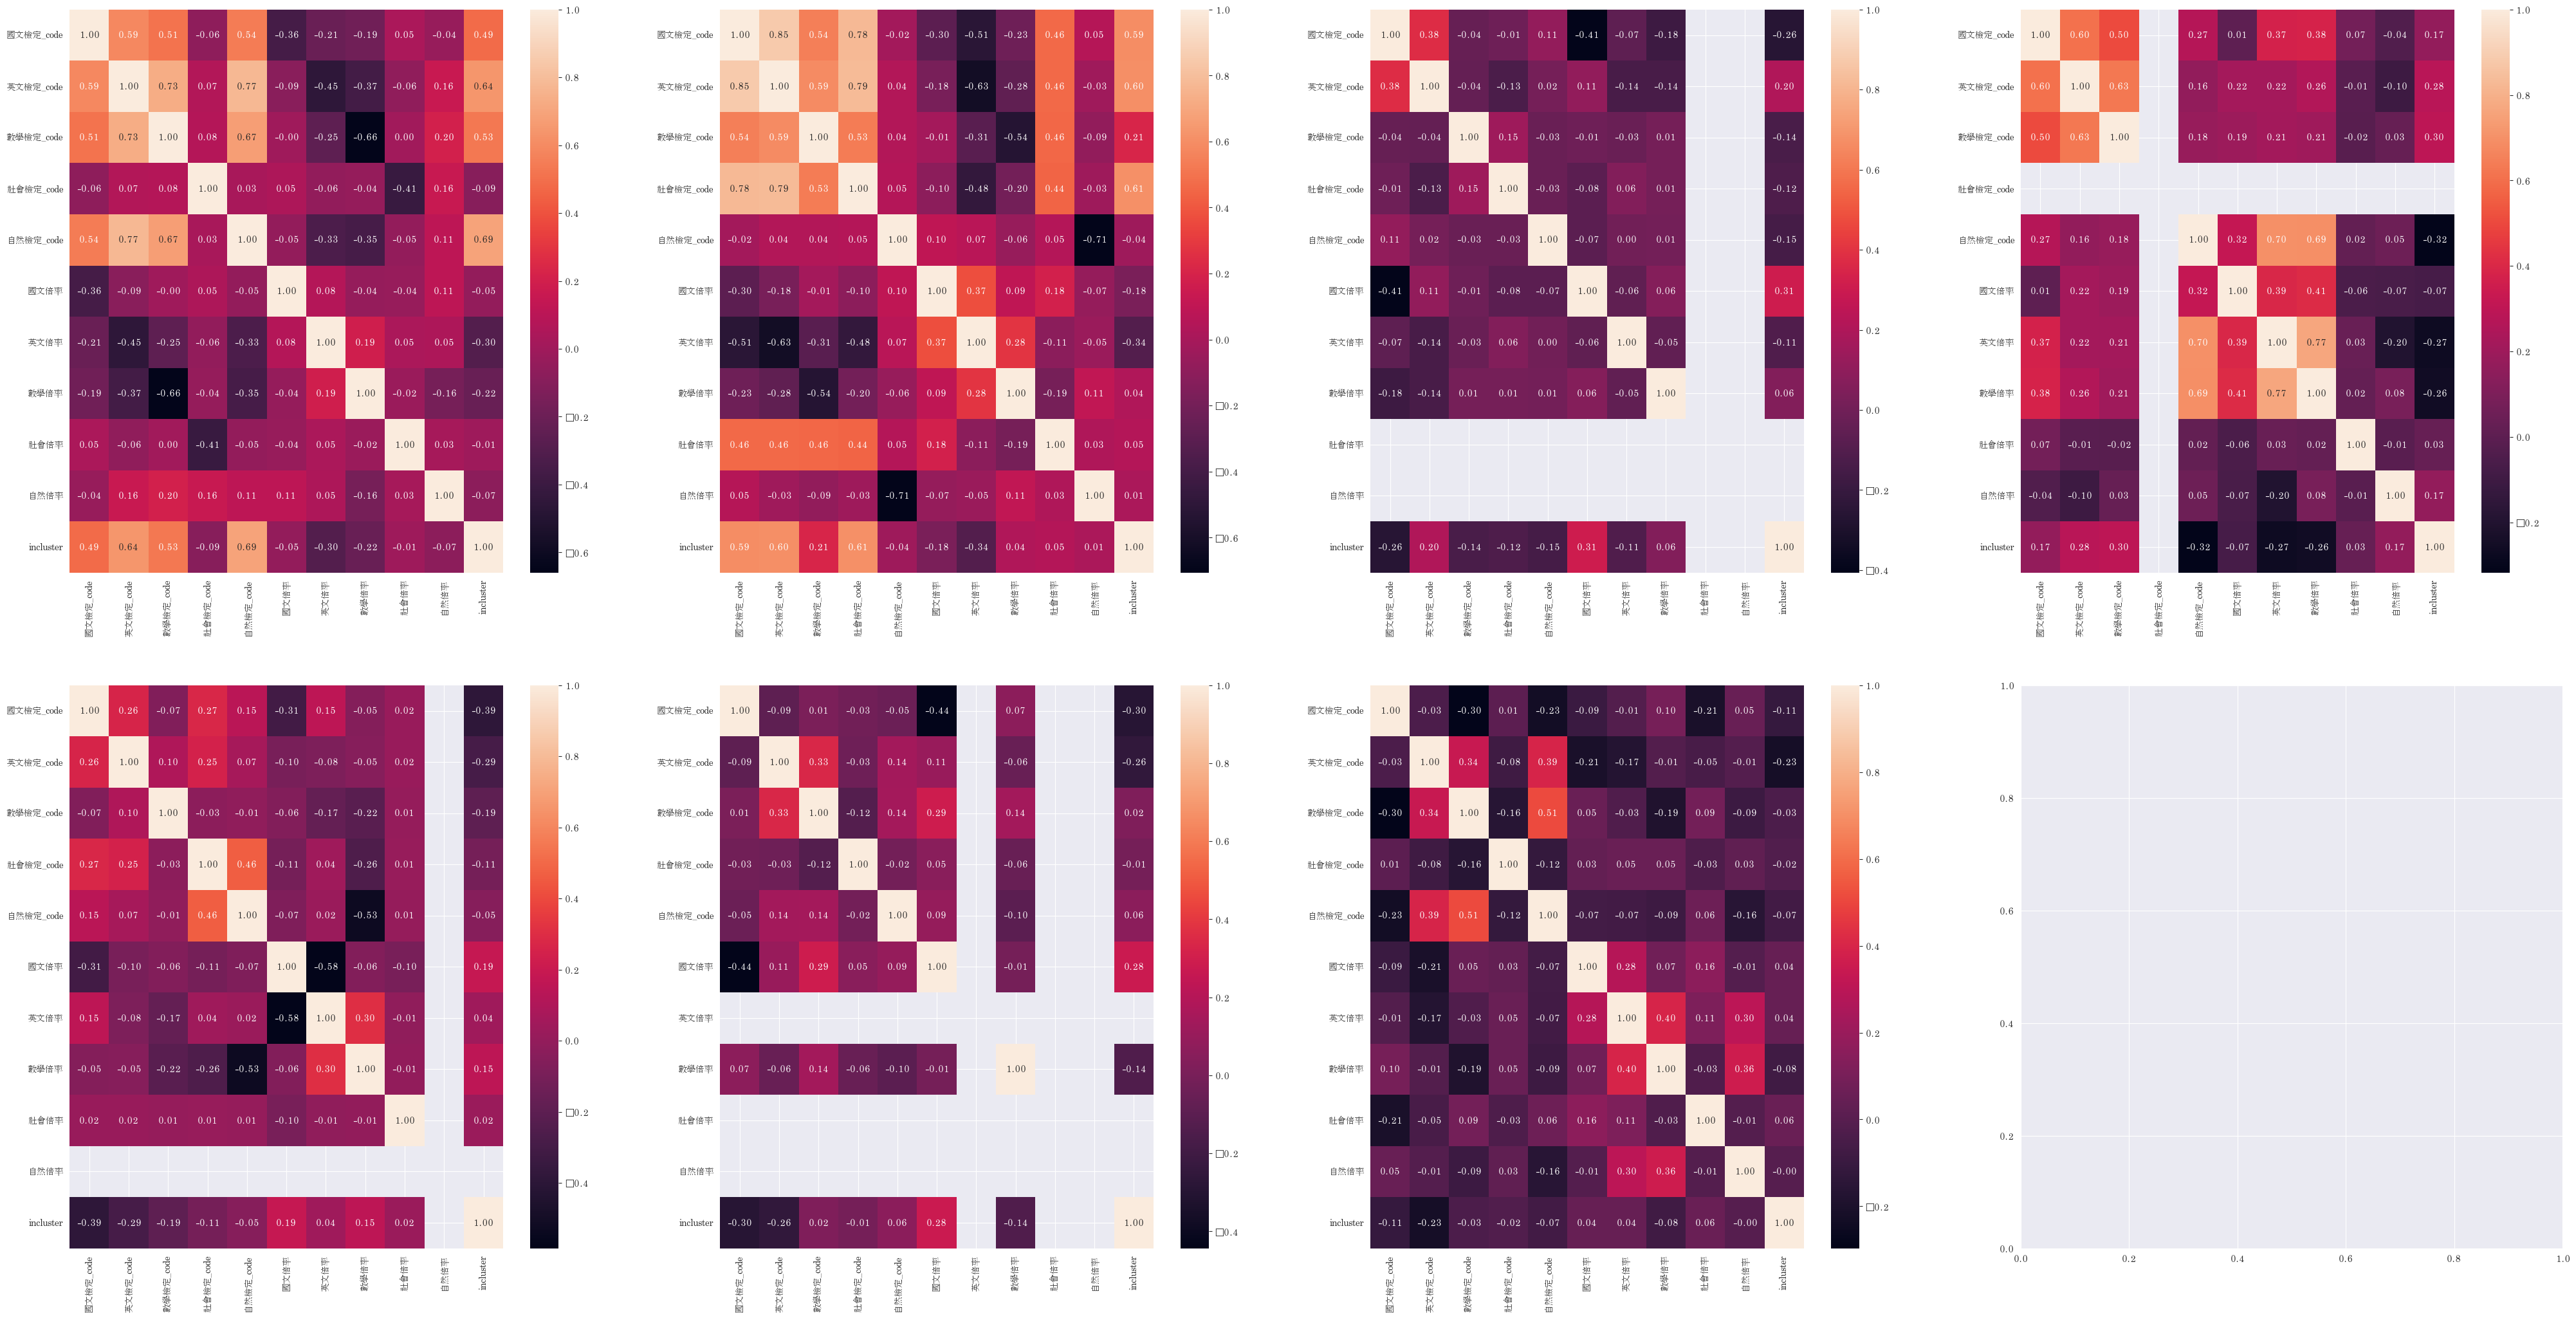

In [88]:
temp = columnlist.copy()
temp.append('incluster')
plt.subplots(2,4,figsize=(50,25))
for idx,df_ in enumerate(clustered_data.values()):
    plt.subplot(2,4,idx+1)
    sns.heatmap(rankdf[rankdf['cluster'] == idx+1][temp].corr(),annot=True,fmt=".2f")
plt.show()

In [89]:
# find the main sieve
"""
for idx,df_ in enumerate(clustered_data.values()):
    print(f'group {idx+1}')
    for col in columnlist:
        print(f"{col} : {(df_[columnlist].mean() - cleaned_df[columnlist].mean()).abs()/(cleaned_df[columnlist].std())}")
"""
#find the main sieve by mean      
mainsievesByMean = dict()
for idx,df_ in enumerate(clustered_data.values()):
    mainsievesByMean[idx+1] = ((df_[columnlist].mean() - cleaned_df[columnlist].mean()).abs()/(cleaned_df[columnlist].std())).nlargest(2).index.values

#find the main sieve by var
mainsievesByVar = dict()
for idx,df_ in enumerate(clustered_data.values()):
    mainsievesByVar[idx+1] = (df_[columnlist].var()/(cleaned_df[columnlist].var())).nlargest(2).index.values

#find the main sieve by assigment
mainsievesByAssigment = {
    # set the main sieve
    1:["數學檢定_code","自然檢定_code"],
    5:["國文檢定_code","社會檢定_code"],
    6:["數學倍率","國文倍率"],
    7:["自然檢定_code","數學檢定_code"],
    2:["社會檢定_code","英文檢定_code"],
    3:["英文檢定_code","國文檢定_code"],
    4:["數學檢定_code","國文檢定_code"],
}

In [90]:
for _ in mainsievesByMean:
    print(mainsievesByMean[_])
print("-"*20,
      "\n")
for _ in mainsievesByVar:
    print(mainsievesByVar[_])
print("-"*20,
      "\n")
for _ in mainsievesByAssigment:
    print( mainsievesByAssigment[_])

['自然倍率' '自然檢定_code']
['社會倍率' '社會檢定_code']
['英文倍率' '數學倍率']
['數學倍率' '數學檢定_code']
['國文倍率' '英文倍率']
['數學倍率' '英文倍率']
['英文倍率' '國文倍率']
-------------------- 

['數學檢定_code' '國文檢定_code']
['社會檢定_code' '國文檢定_code']
['國文倍率' '國文檢定_code']
['國文檢定_code' '國文倍率']
['國文檢定_code' '社會檢定_code']
['國文倍率' '數學檢定_code']
['自然檢定_code' '數學檢定_code']
-------------------- 

['數學檢定_code', '自然檢定_code']
['國文檢定_code', '社會檢定_code']
['數學倍率', '國文倍率']
['自然檢定_code', '數學檢定_code']
['社會檢定_code', '英文檢定_code']
['英文檢定_code', '國文檢定_code']
['數學檢定_code', '國文檢定_code']


In [91]:
# generate the rank of the main sieves
#rankdf = pd.read_csv(f"./analyzeCodes/tempdata/{'simplify' if USE_SIMPLE_DATA else 'raw'}_in_out_cluster")

rankdf[sieve2] = -rankdf[sieve2]
clustered_rank_df = dict()
clustered_df = dict()
for idx in range(1,8):
    clustered_rank_df[idx] = rankdf[rankdf['cluster'] == idx]
    clustered_rank_df[idx] = clustered_rank_df[idx][[ '學系代碼','國文檢定_code', '英文檢定_code',
                                                      '數學檢定_code',
                                                      '社會檢定_code', '自然檢定_code', '國文倍率', '英文倍率', '數學倍率', '社會倍率', '自然倍率']]
    clustered_df[idx] = rankdf[rankdf['cluster'] == idx]
    for col in columnlist:
        clustered_rank_df[idx][col] = clustered_rank_df[idx][col].rank(pct = True)
        




sieve1rankByMean = []
sieve2rankByMean = []
sieve1rankByVar = []
sieve2rankByVar = []
sieve1rankByAssigment = []
sieve2rankByAssigment = []


for id,row in rankdf.iterrows():
    
    idx = row['cluster']
    sieve1rankByMean.append(clustered_rank_df[idx][clustered_rank_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByMean[idx][0]]._values[0])
    sieve2rankByMean.append(clustered_rank_df[idx][clustered_rank_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByMean[idx][1]]._values[0])
    sieve1rankByVar.append(clustered_rank_df[idx][clustered_rank_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByVar[idx][0]]._values[0])
    sieve2rankByVar.append(clustered_rank_df[idx][clustered_rank_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByVar[idx][1]]._values[0])
    sieve1rankByAssigment.append(clustered_rank_df[idx][clustered_rank_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByAssigment[idx][0]]._values[0])
    sieve2rankByAssigment.append(clustered_rank_df[idx][clustered_rank_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByAssigment[idx][1]]._values[0])
rankdf['main_sieve1_bymean_rank'] = sieve1rankByMean
rankdf['main_sieve2_bymean_rank'] = sieve2rankByMean
rankdf['main_sieve1_byvar_rank'] = sieve1rankByVar
rankdf['main_sieve2_byvar_rank'] = sieve2rankByVar
rankdf['main_sieve1_byassigment_rank'] = sieve1rankByAssigment
rankdf['main_sieve2_byassigment_rank'] = sieve2rankByAssigment



sieve1ByMean = []
sieve2ByMean = []
sieve1ByVar = []
sieve2ByVar = []
sieve1ByAssigment = []
sieve2ByAssigment = []

for id,row in rankdf.iterrows():
    idx = row['cluster']
    sieve1ByMean.append(clustered_df[idx][clustered_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByMean[idx][0]]._values[0])
    sieve2ByMean.append(clustered_df[idx][clustered_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByMean[idx][1]]._values[0])
    sieve1ByVar.append(clustered_df[idx][clustered_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByVar[idx][0]]._values[0])
    sieve2ByVar.append(clustered_df[idx][clustered_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByVar[idx][1]]._values[0])
    sieve1ByAssigment.append(clustered_df[idx][clustered_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByAssigment[idx][0]]._values[0])
    sieve2ByAssigment.append(clustered_df[idx][clustered_df[idx]['學系代碼'] == row['學系代碼']][mainsievesByAssigment[idx][1]]._values[0])

rankdf['main_sieve1_bymean'] = sieve1ByMean
rankdf['main_sieve2_bymean'] = sieve2ByMean
rankdf['main_sieve1_byvar'] = sieve1ByVar
rankdf['main_sieve2_byvar'] = sieve2ByVar
rankdf['main_sieve1_byassigment'] = sieve1ByAssigment
rankdf['main_sieve2_byassigment'] = sieve2ByAssigment


       

# do some regression to find the relationship between the rank and the competition

In [92]:
rankdf[sieve2] = -rankdf[sieve2]
rankdf.to_csv(f"./tempdata/{'simplify' if USE_SIMPLE_DATA else 'raw'}_in_out_cluster_with_sieve.csv")

In [93]:
# over all data regression
import statsmodels.api as sm
X = rankdf[['main_sieve1_bymean_rank','main_sieve2_bymean_rank','main_sieve1_byvar_rank','main_sieve2_byvar_rank','main_sieve1_byassigment_rank','main_sieve2_byassigment_rank']]
Y = rankdf['incluster']

X = sm.add_constant(X)
model = sm.OLS(Y,X,missing='drop')
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:              incluster   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     63.74
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           6.07e-73
Time:                        19:10:22   Log-Likelihood:                 382.13
No. Observations:                2123   AIC:                            -750.3
Df Residuals:                    2116   BIC:                            -710.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [94]:
# seperate the data by cluster
clustered_rank_data = {}
for group in rankdf['cluster'].value_counts().sort_index().index.values:
    clustered_rank_data[group] = rankdf[rankdf['cluster'] == group]

for idx,data in enumerate( clustered_rank_data.values()):
    X = data[['main_sieve1_bymean_rank','main_sieve2_bymean_rank','main_sieve1_byvar_rank','main_sieve2_byvar_rank','main_sieve1_byassigment_rank','main_sieve2_byassigment_rank']]
    Y = data['incluster']
    X = sm.add_constant(X)
    model = sm.OLS(Y,X,missing='drop')
    results = model.fit()
    print(idx+1,"group",end = "\n ")
    print('missing number:', len(Y) - len(results.fittedvalues))
    print(results.summary())
    
for key,data in clustered_rank_data.items():
    X = data['main_sieve1_byassigment_rank']
    Y = data['incluster']
    X = sm.add_constant(X)
    model = sm.OLS(Y,X,missing='drop')
    results = model.fit()
    print(f'\n\n\n group {key}',end = "\n ")
    print('missing number:', len(Y) - len(results.fittedvalues))
    print(results.summary())

1 group
 missing number: 4
                            OLS Regression Results                            
Dep. Variable:              incluster   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     137.7
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           1.33e-79
Time:                        19:10:22   Log-Likelihood:                 293.13
No. Observations:                 513   AIC:                            -576.3
Df Residuals:                     508   BIC:                            -555.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

# analyze the key words in the cluster


In [95]:
import jieba
jieba.load_userdict('./dict.txt')


clustered_word_feq = dict()

all_wordlist = []

for idx,df_ in enumerate(clustered_rank_data.values()):
    wordlists = []
    departmeantlist = df_['學系名稱_trim'].values
    for dep in departmeantlist:
        wordlists.extend(jieba.lcut_for_search(dep,HMM=True))
    all_wordlist.extend(wordlists)
    wordset = set(wordlists)
    freq = [ wordlists.count(word)/len(departmeantlist) for word in wordset]
    clustered_word_feq[idx+1] = pd.DataFrame({'word':list(wordset),'freq':freq}).sort_values('freq',ascending=False)
    
all_wordset = set(all_wordlist)
all_num = {word:all_wordlist.count(word) for word in all_wordset}
all_freq = {word:all_wordlist.count(word)/len(all_wordlist) for word in all_wordset}
    
    
        
        

/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25945 (\N{CJK UNIFIED IDEOGRAPH-6559}) missing from current font.
  func(*args, **kwargs)
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 38738 (\N{CJK UNIFIED IDEOGRAPH-9752}) missing from current font.
  func(*args, **kwargs)
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25945 (\N{CJK UNIFIED IDEOGRAPH-6559}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38738 (\N{CJK UNIFIED IDEOGRAPH-9752}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

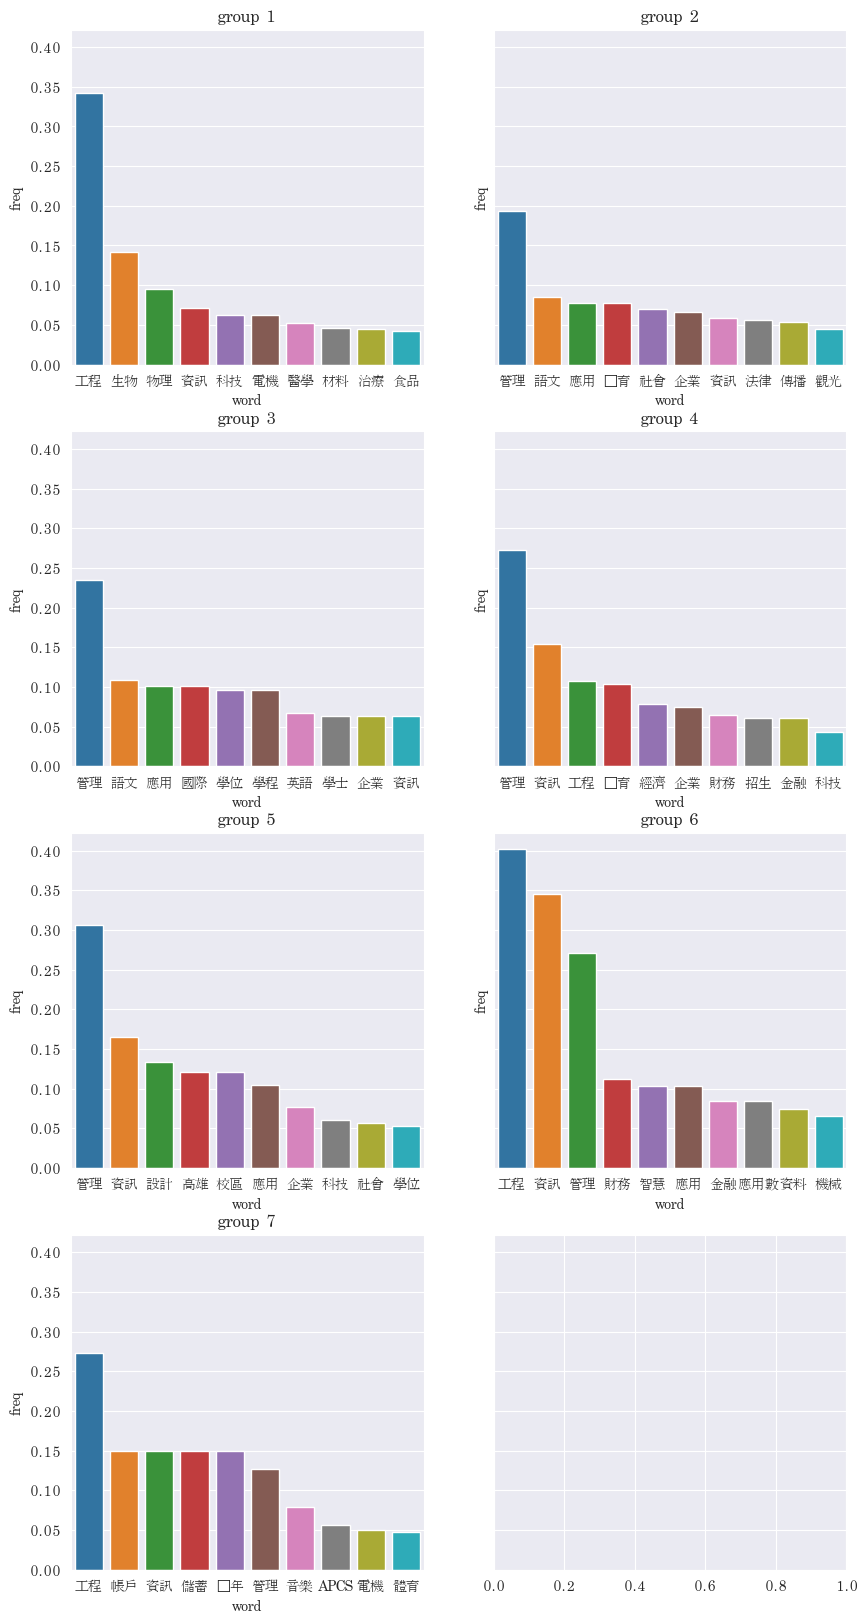

In [96]:
# draw the top 10 word in each cluster
plt.subplots(4,2,figsize=(10,20),sharey=True)
for idx,df_ in enumerate(clustered_word_feq.values()):
    plt.subplot(4,2,idx+1)
    dftemp = df_.copy()
    dftemp = dftemp.drop(dftemp[dftemp['word'].str.len() < 2].index)
    dftemp = dftemp.drop(dftemp[dftemp['word'] == ('學系' or '(' or ')' or '組' or '與' or '校區' or '高雄')].index)
    plt.title(f'group {idx+1}')
    sns.barplot(x='word',y='freq',data=dftemp[:10])

/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25945 (\N{CJK UNIFIED IDEOGRAPH-6559}) missing from current font.
  func(*args, **kwargs)
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 38738 (\N{CJK UNIFIED IDEOGRAPH-9752}) missing from current font.
  func(*args, **kwargs)
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25945 (\N{CJK UNIFIED IDEOGRAPH-6559}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38738 (\N{CJK UNIFIED IDEOGRAPH-9752}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

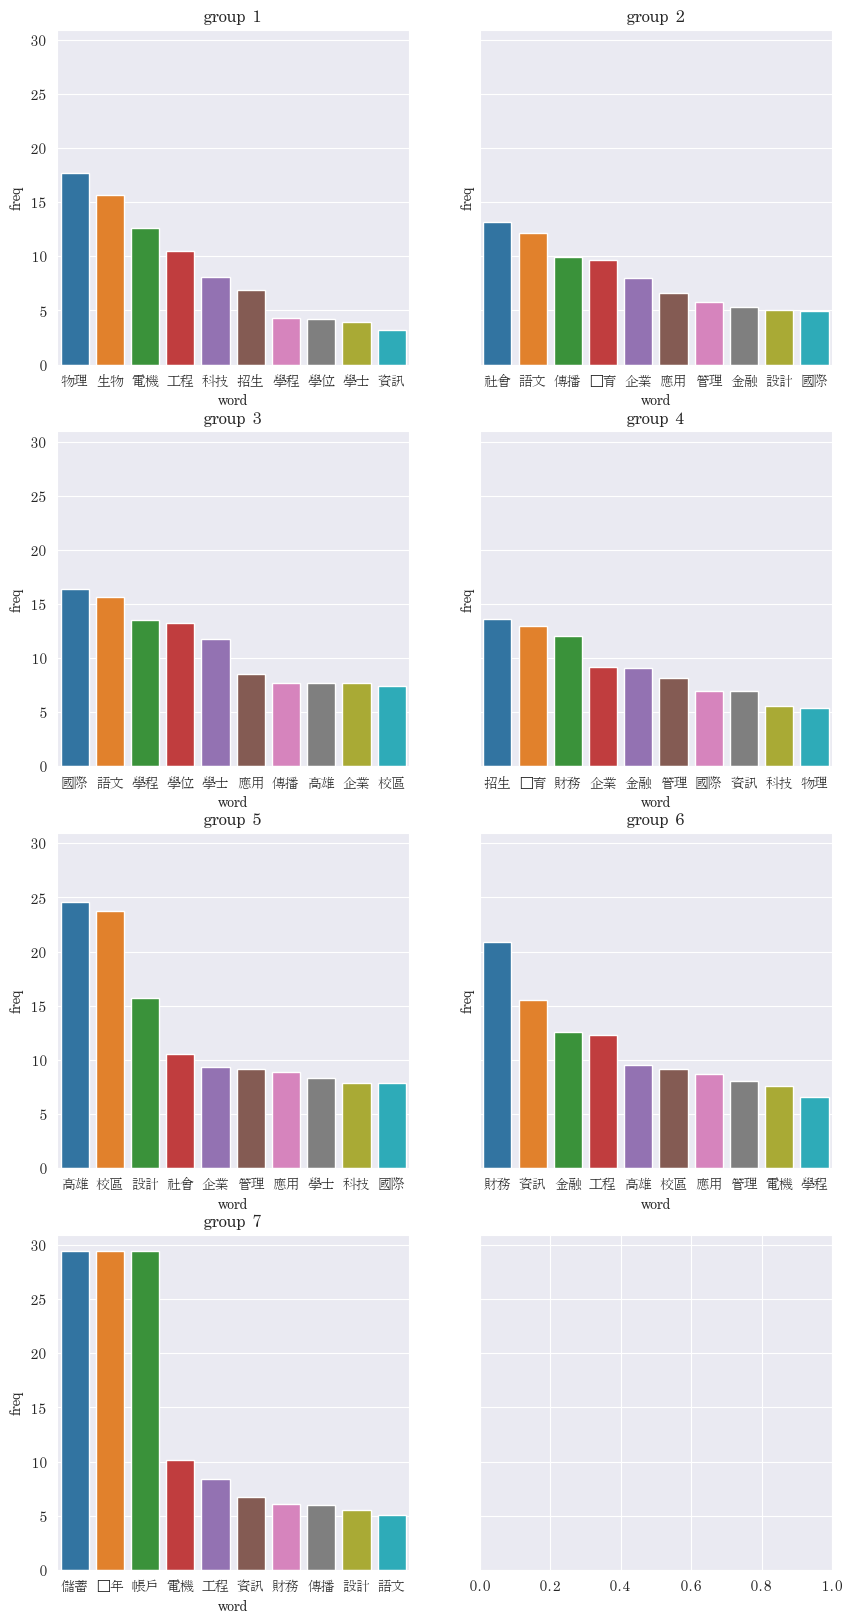

In [97]:
# draw the relative freq of the word
plt.subplots(4,2,figsize=(10,20),sharey=True)
for idx,df_ in enumerate(clustered_word_feq.values()):
    plt.subplot(4,2,idx+1)
    dftemp = df_.copy()
    droplist = dftemp[dftemp['word'].map(all_num) < 50].index
    dftemp.drop(droplist,inplace = True)

    for _,row in dftemp.iterrows():
        dftemp.loc[_,['freq']] = row['freq']/all_freq[row['word']]
    dftemp = dftemp.drop(dftemp[dftemp['word'].str.len() < 2].index)
    dftemp = dftemp.drop(dftemp[dftemp['word'] == ('學系' or '(' or ')' or '組' or '與' or '校區' or '高雄')].index)
    dftemp.sort_values('freq',ascending=False,inplace=True)
    plt.title(f'group {idx+1}')
    sns.barplot(x='word',y='freq',data=dftemp[:10])

In [98]:
for idx,df_ in enumerate(clustered_word_feq.keys()):
    print(f'group {idx+1}')
    try:
        print(clustered_word_feq[df_][clustered_word_feq[df_]['word'] == '法律'])
    except:
        print('no law')
    print('---------------------------------')

group 1
Empty DataFrame
Columns: [word, freq]
Index: []
---------------------------------
group 2
    word      freq
311   法律  0.056471
---------------------------------
group 3
   word      freq
85   法律  0.042017
---------------------------------
group 4
Empty DataFrame
Columns: [word, freq]
Index: []
---------------------------------
group 5
    word      freq
265   法律  0.020161
---------------------------------
group 6
Empty DataFrame
Columns: [word, freq]
Index: []
---------------------------------
group 7
Empty DataFrame
Columns: [word, freq]
Index: []
---------------------------------


/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 28165 (\N{CJK UNIFIED IDEOGRAPH-6E05}) missing from current font.
  func(*args, **kwargs)
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  func(*args, **kwargs)
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25945 (\N{CJK UNIFIED IDEOGRAPH-6559}) missing from current font.
  func(*args, **kwargs)
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 22872 (\N{CJK UNIFIED IDEOGRAPH-5958}) missing from current font.
  func(*args, **kwargs)
/Users/eric/Documents/SchoolCourses/schoolNe

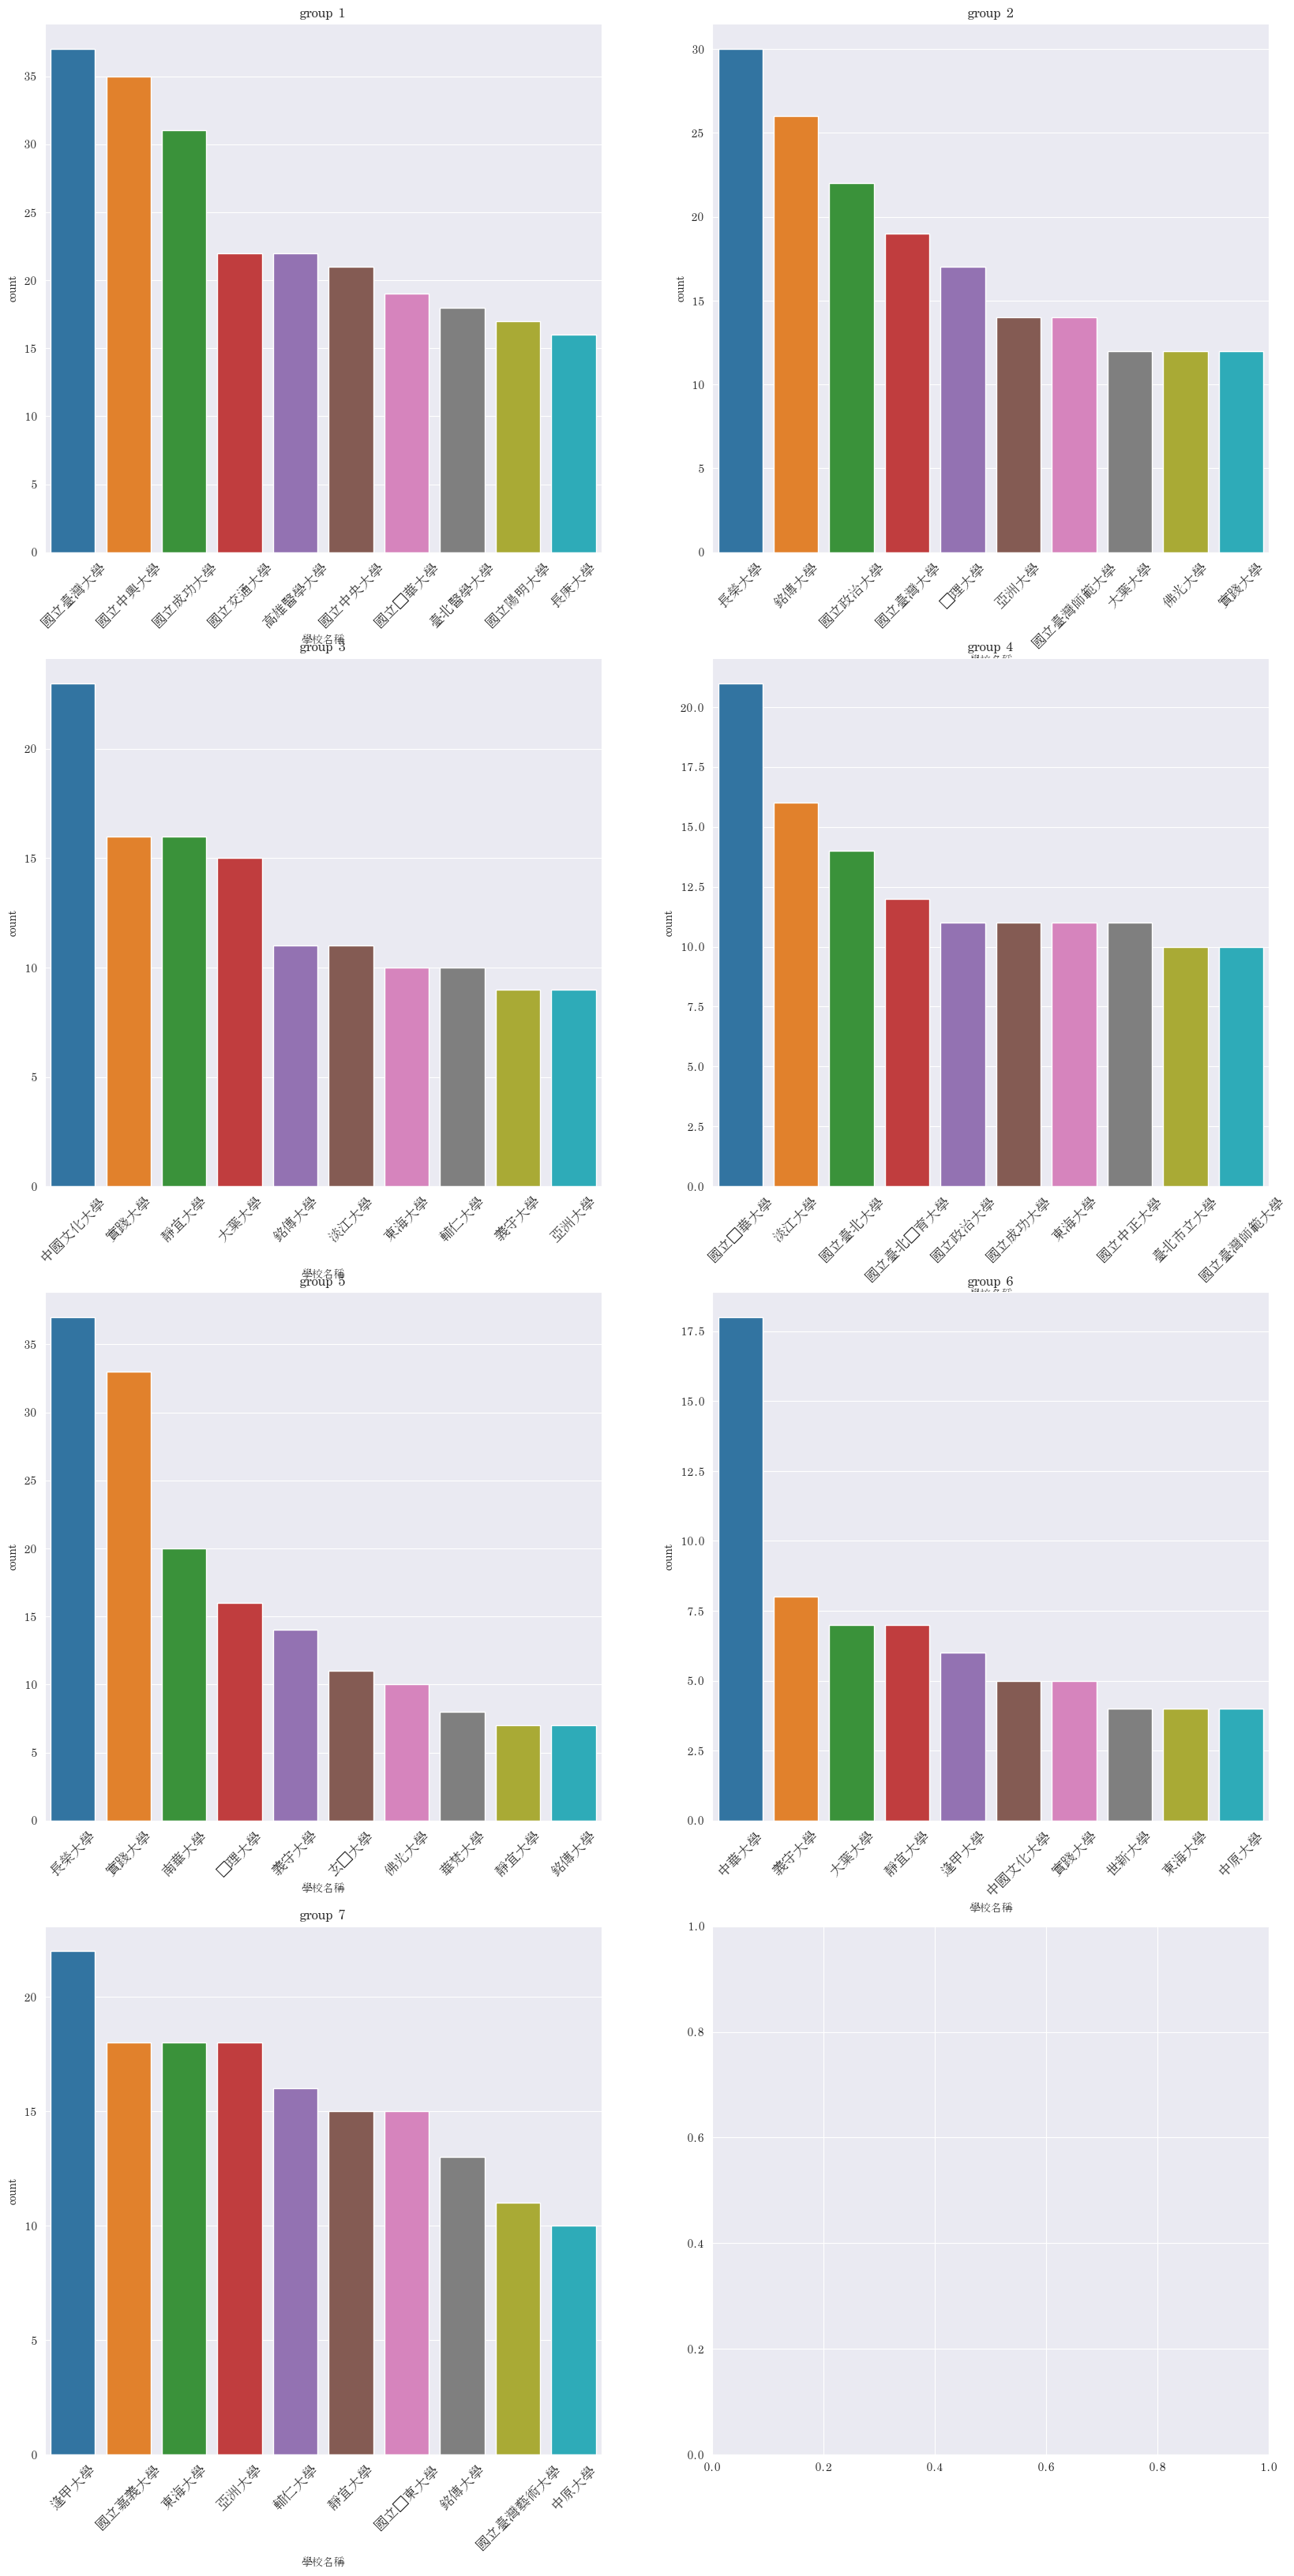

In [99]:
# draw the top 10 college in each cluster
plt.subplots(4,2,figsize=(20,40))
for idx,df_ in enumerate(clustered_rank_data.values()):
    plt.subplot(4,2,idx+1)
    frq = df_['學校名稱_encoded'].value_counts()
    frq = pd.DataFrame({'學校名稱':frq.index,'count':frq.values})
    sns.barplot(x='學校名稱',y='count',data=frq[:10])
    plt.title(f'group {idx+1}')
    plt.xticks(fontsize=13,rotation=45)

# analyze the different of using different the sieve

In [100]:
df1 = rankdf.copy()

In [101]:
df1

,Unnamed: 0,國文檢定_code,英文檢定_code,數學檢定_code,社會檢定_code,自然檢定_code,國文倍率,英文倍率,數學倍率,社會倍率,...,main_sieve1_byvar_rank,main_sieve2_byvar_rank,main_sieve1_byassigment_rank,main_sieve2_byassigment_rank,main_sieve1_bymean,main_sieve2_bymean,main_sieve1_byvar,main_sieve2_byvar,main_sieve1_byassigment,main_sieve2_byassigment
0,0,0,0,0,0,0,30.0,30.0,30.0,30.0,...,0.397059,0.320588,0.397059,0.320588,-30.0,-30.0,0.0,0.0,0.0,0.0
1,1,12,0,0,0,0,10.0,30.0,30.0,30.0,...,0.461694,0.475806,0.461694,0.475806,-10.0,-30.0,12.0,0.0,12.0,0.0
2,2,12,0,0,0,0,10.0,30.0,30.0,30.0,...,0.461694,0.475806,0.461694,0.475806,-10.0,-30.0,12.0,0.0,12.0,0.0
3,3,12,0,0,0,0,3.0,30.0,30.0,30.0,...,0.461694,0.475806,0.461694,0.475806,-3.0,-30.0,12.0,0.0,12.0,0.0
4,4,12,0,0,0,0,10.0,30.0,30.0,30.0,...,0.461694,0.475806,0.461694,0.475806,-10.0,-30.0,12.0,0.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,2149,0,0,25,0,0,30.0,30.0,30.0,30.0,...,0.397059,0.779412,0.397059,0.779412,-30.0,-30.0,0.0,25.0,0.0,25.0
2150,2150,0,0,50,0,0,30.0,30.0,7.0,30.0,...,0.387850,0.841121,0.018692,0.387850,-7.0,-30.0,-30.0,50.0,-7.0,-30.0
2151,2151,0,0,50,0,0,30.0,30.0,30.0,30.0,...,0.397059,0.914706,0.397059,0.914706,-30.0,-30.0,0.0,50.0,0.0,50.0
2152,2152,0,0,50,0,0,3.0,3.0,3.0,30.0,...,0.550290,0.310445,0.550290,0.037718,-3.0,0.0,50.0,0.0,50.0,0.0


In [102]:
maxs1 = []
mins2 = []
for idx,row in df1.iterrows():
    maxs1.append(max([row[col] for col in sieve1]))
    mins2.append(min(min([row[col] for col in sieve2]),row['自設科目組合倍率'] if row['自設科目組合倍率'] != 0 else 30))

s1mean = pd.Series(maxs1).median()
s2mean = pd.Series(mins2).median()
s1 = [True if i >= s1mean else False for i in maxs1]
s2 = [True if i <= s2mean else False for i in mins2]
df1['max_sieve1'] = s1
df1['min_sieve2'] = s2
print(s1mean,s2mean)
    
    

50.0 3.0


In [103]:
"""

high first sieve       | high first sieve
high second sieve      | low second sieve
        0              |       1
-----------------------|------------------------
low first sieve        | low first sieve
high second sieve      | low second sieve
        2              |        3           
"""
mask1 = df1['max_sieve1'] == True
mask2 = df1['min_sieve2'] == True
df1s = [df1[mask1 & mask2],df1[mask1 & ~mask2],df1[~mask1 & mask2],df1[~mask1 & ~mask2]]
print([len(df1s[i]) for i in range(4)])

[882, 232, 637, 403]


In [104]:
df1s[2]

,Unnamed: 0,國文檢定_code,英文檢定_code,數學檢定_code,社會檢定_code,自然檢定_code,國文倍率,英文倍率,數學倍率,社會倍率,...,main_sieve1_byassigment_rank,main_sieve2_byassigment_rank,main_sieve1_bymean,main_sieve2_bymean,main_sieve1_byvar,main_sieve2_byvar,main_sieve1_byassigment,main_sieve2_byassigment,max_sieve1,min_sieve2
3,3,12,0,0,0,0,3.0,30.0,30.0,30.0,...,0.461694,0.475806,-3.0,-30.0,12.0,0.0,12.0,0.0,False,True
6,6,0,0,0,12,0,30.0,30.0,30.0,3.0,...,0.371765,0.244706,-3.0,12.0,12.0,0.0,12.0,0.0,False,True
9,9,0,12,0,0,0,30.0,3.0,30.0,30.0,...,0.340336,0.258403,-3.0,-30.0,-30.0,0.0,12.0,0.0,False,True
10,10,0,0,0,12,0,3.0,30.0,30.0,3.0,...,0.371765,0.244706,-3.0,12.0,12.0,0.0,12.0,0.0,False,True
11,11,12,0,0,0,0,30.0,30.0,30.0,3.0,...,0.123529,0.244706,-3.0,0.0,0.0,12.0,0.0,0.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2141,0,25,0,0,0,30.0,30.0,30.0,30.0,...,0.397059,0.320588,-30.0,-30.0,0.0,0.0,0.0,0.0,False,True
2143,2143,0,25,0,0,0,6.0,3.0,30.0,30.0,...,0.569328,0.258403,-3.0,-30.0,-6.0,0.0,25.0,0.0,False,True
2144,2144,0,25,0,0,0,30.0,3.0,6.0,30.0,...,0.069892,0.179211,-6.0,0.0,0.0,-30.0,0.0,0.0,False,True
2148,2148,0,25,0,0,0,30.0,30.0,30.0,30.0,...,0.397059,0.320588,-30.0,-30.0,0.0,0.0,0.0,0.0,False,True


/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 28165 (\N{CJK UNIFIED IDEOGRAPH-6E05}) missing from current font.
  func(*args, **kwargs)
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  func(*args, **kwargs)
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 23631 (\N{CJK UNIFIED IDEOGRAPH-5C4F}) missing from current font.
  func(*args, **kwargs)
/Users/eric/Documents/SchoolCourses/schoolNetworkGithub/analyzeCodes/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28165 (\N{CJK UNIFIED IDEOGRAPH-6E05}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eric/Documents

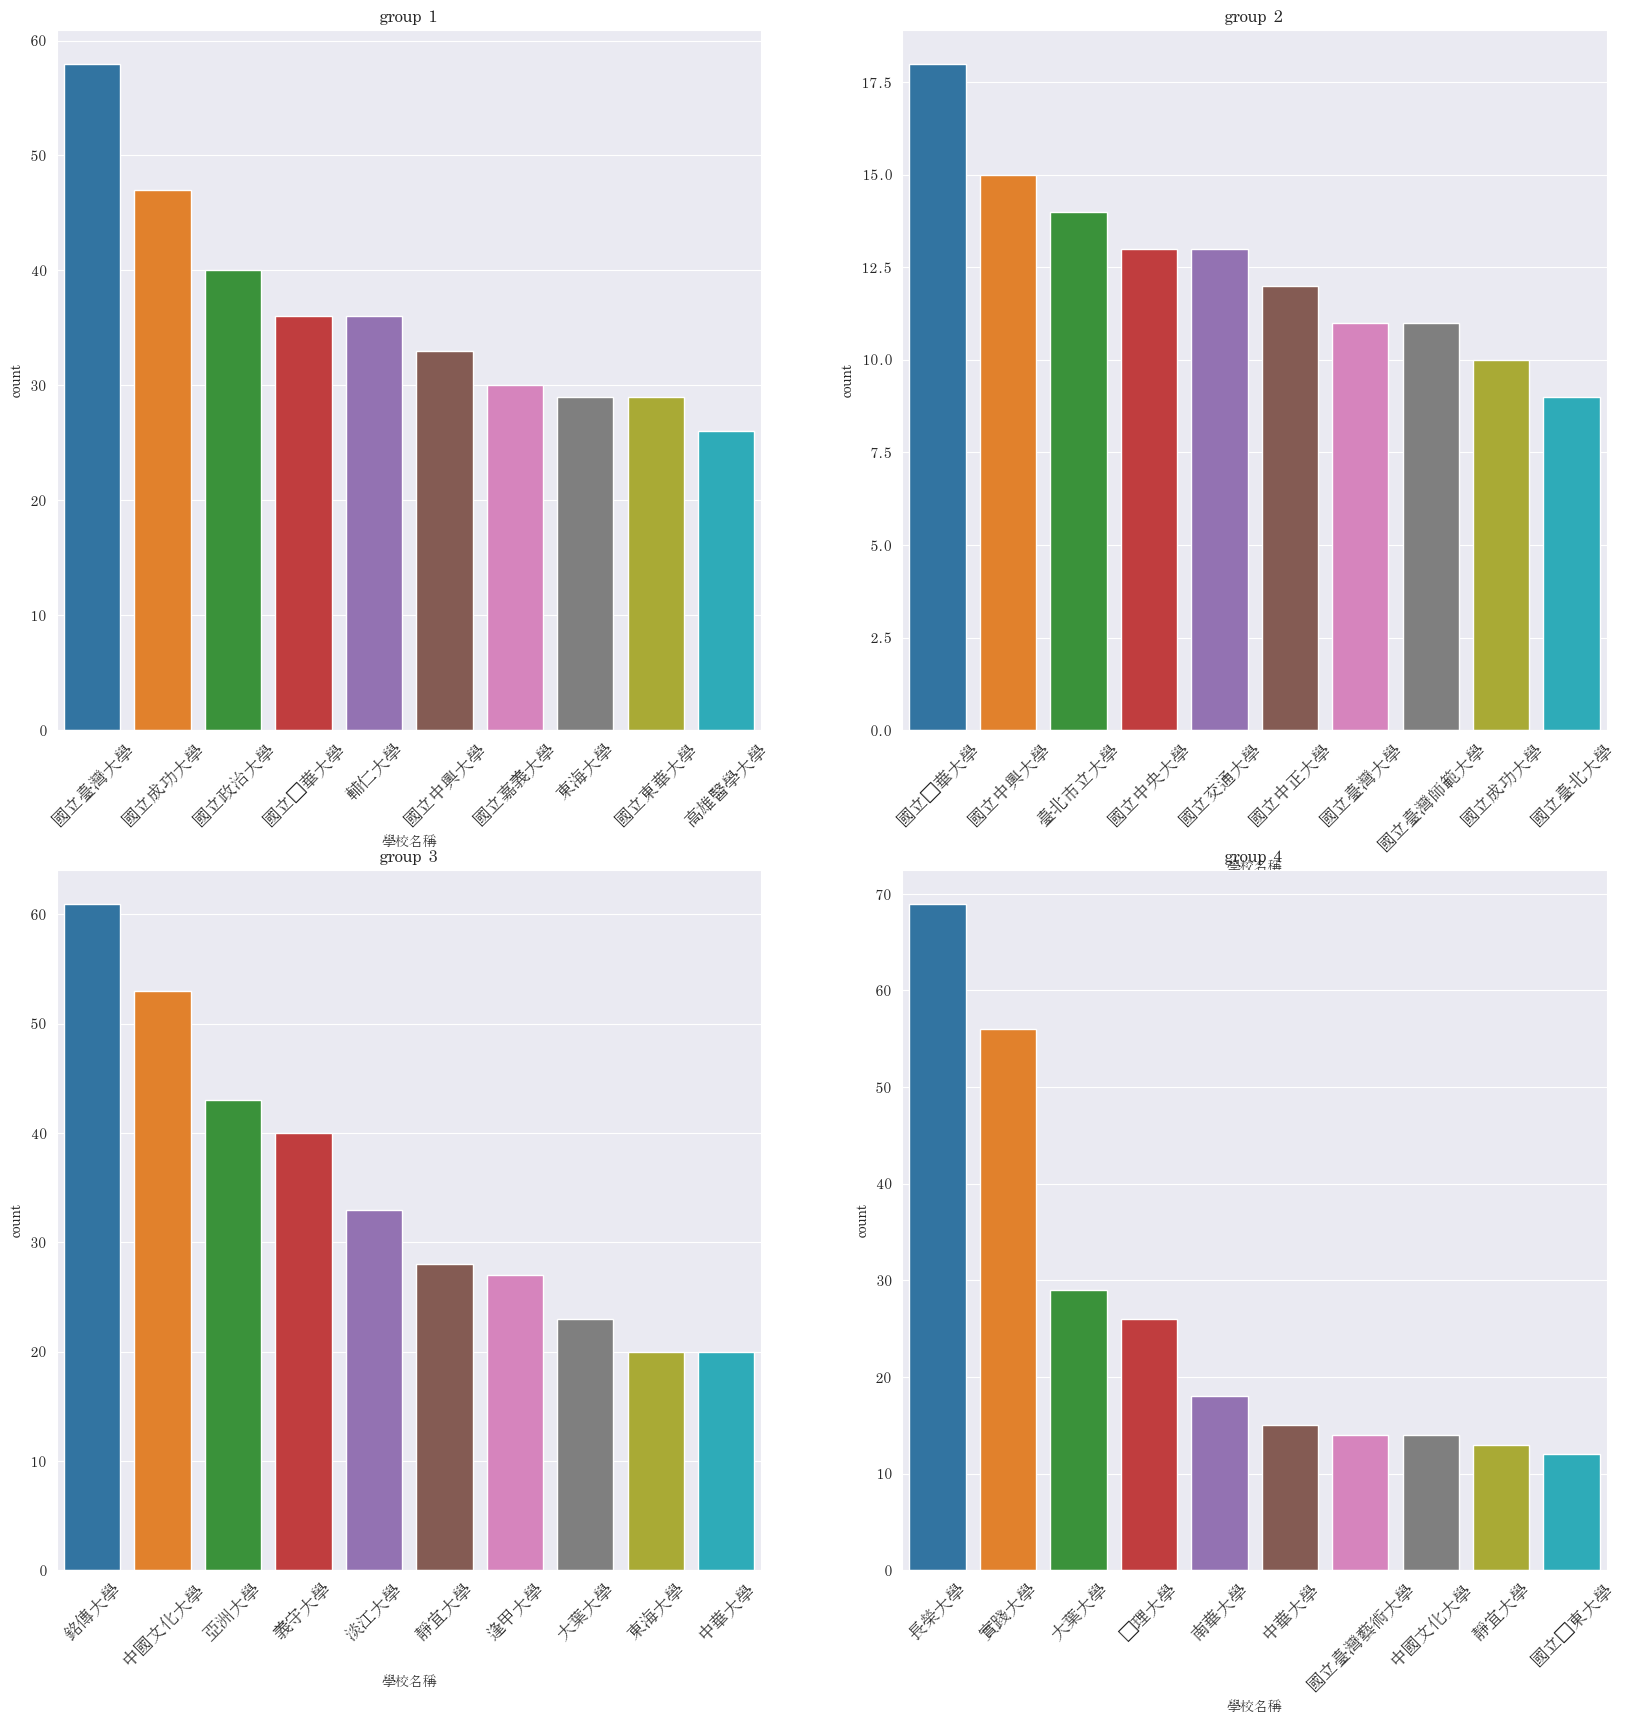

In [105]:
# extract the word freq
plt.subplots(2,2,figsize=(20,20))
for idx,df_ in enumerate(df1s):
    plt.subplot(2,2,idx+1)
    frq = df_['學校名稱_encoded'].value_counts()
    frq = pd.DataFrame({'學校名稱':frq.index,'count':frq.values})
    sns.barplot(x='學校名稱',y='count',data=frq[:10])
    plt.title(f'group {idx+1}')
    plt.xticks(fontsize=13,rotation=45)


真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
真理大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False
亞洲大學 False

Text(0, 0.5, 'freq')

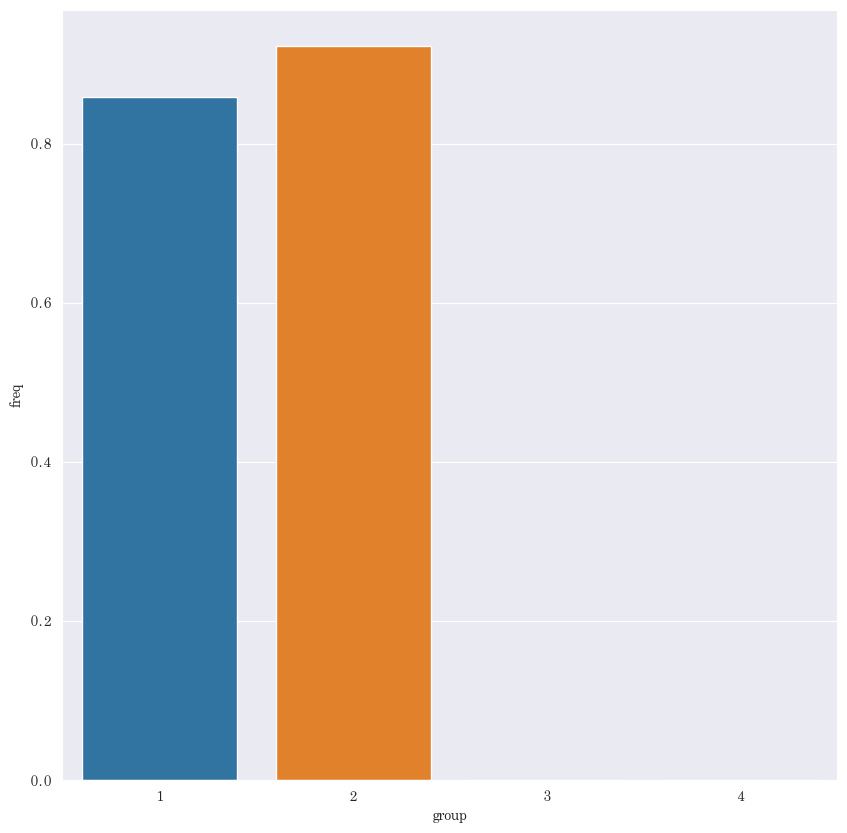

In [106]:
plt.figure(figsize=(10,10))
public_freq = [0,0,0,0]
for idx,row in df1.iterrows():
    print(row['學校名稱_encoded'],('國立') in row['學校名稱_encoded'])
    if ('市立' in row['學校名稱_encoded']) or ('國立' in row['學校名稱_encoded']):
        print(2*int(row['max_sieve1']==False)+int(row['min_sieve2'] == False))
        public_freq[2*int(row['max_sieve1']==False)+int(row['min_sieve2']) == False] += 1
public_freq = [public_freq[i]/len(df1s[i]) for i in range(4)]
sns.barplot(x=[1,2,3,4],y=public_freq)
plt.xlabel('group')
plt.ylabel('freq')

In [107]:
# add city or not to the data
schoolPosition = pd.read_csv('rawData/schoolPosition.csv')


# 108 selfapplication Data


In [108]:

df_108Application = pd.read_stata('rawData/108 Selfapplication.dta')

In [109]:
transfermap = {
    '頂標': 88,
    '前標': 75,
    '均標': 50,
    '後標': 25,
    '底標': 12,
    '--': 0,
    '88':88,
    '75':75,
    '50':50,
    "25":25,
    '12':12

}
codeList = ['國文檢定','英文檢定','數學檢定',
            '社會檢定','自然檢定']
codeList2 = ['國文採計','英文採計','數學採計','社會採計','自然採計']
codeList3 = ['國文倍率','英文倍率','數學倍率','社會倍率','自然倍率']
codeList4 = ['unitier','預定甄試人數','甄試費用','口試佔比','書審佔比']

columnlist_108 = ['國文檢定_108', '英文檢定_108', '數學檢定_108', '社會檢定_108', '自然檢定_108', '國文倍率_108', '英文倍率_108', '數學倍率_108', '社會倍率_108', '自然倍率_108']
codeList3_108 = ['國文倍率_108','英文倍率_108','數學倍率_108','社會倍率_108','自然倍率_108']

In [110]:
for idx, row in df_108Application.iterrows():
    for _ in codeList2:
        df_108Application.loc[idx,_] = float(df_108Application.loc[idx,_] * df_108Application.loc[idx,'自設科目組合倍率'])
    for _ in codeList:
        df_108Application[_] = df_108Application[_].astype('str')
        df_108Application.loc[idx,_] = transfermap[df_108Application.loc[idx,_]]

for _ in codeList:
    df_108Application[_] = df_108Application[_].astype('int')

for col in codeList3:
    df_108Application[col] = df_108Application[col].apply(lambda x: x if x != 0 else 30)
df_108Application['學系代碼'] = df_108Application['學系代碼'].astype('int')

df_108Application = df_108Application[['學校名稱',  '學系名稱', '學系代碼','國文採計',
                                       '英文採計',
                                       '數學採計', '社會採計', '自然採計', '自設科目組合', '自設科目組合倍率',  '預定甄試人數',
                                       ]+codeList+codeList3]
df_108Application.columns = [(col+'_108' if col != '學系代碼' else col) for col in df_108Application.columns]

# merge 108 data to 109 data

In [111]:
df_108Application.count()

學校名稱_108        2092
學系名稱_108        2092
學系代碼            2092
國文採計_108        2092
英文採計_108        2092
數學採計_108        2092
社會採計_108        2092
自然採計_108        2092
自設科目組合_108      2092
自設科目組合倍率_108    2092
預定甄試人數_108      2092
國文檢定_108        2092
英文檢定_108        2092
數學檢定_108        2092
社會檢定_108        2092
自然檢定_108        2092
國文倍率_108        2092
英文倍率_108        2092
數學倍率_108        2092
社會倍率_108        2092
自然倍率_108        2092
dtype: int64

In [112]:
df_108Application['學系名稱_trim'] = df_108Application['學系名稱_108'].apply(lambda  x:x.replace(' ',''))
df_108Application['學校名稱_encoded'] = df_108Application['學校名稱_108'].apply(lambda x: x.replace(' ',''))
df_108Application['mergeKey'] = df_108Application['學校名稱_encoded'] + df_108Application['學系名稱_trim']

In [113]:
df_108Application

,學校名稱_108,學系名稱_108,學系代碼,國文採計_108,英文採計_108,數學採計_108,社會採計_108,自然採計_108,自設科目組合_108,自設科目組合倍率_108,...,社會檢定_108,自然檢定_108,國文倍率_108,英文倍率_108,數學倍率_108,社會倍率_108,自然倍率_108,學系名稱_trim,學校名稱_encoded,mergeKey
0,國立臺灣大學,中國文學系 ...,1012,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,50,0,3.0,6.0,30.0,8.0,30.0,中國文學系,國立臺灣大學,國立臺灣大學中國文學系
1,國立臺灣大學,外國語文學系 ...,1022,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,75,0,30.0,2.5,30.0,30.0,30.0,外國語文學系,國立臺灣大學,國立臺灣大學外國語文學系
2,國立臺灣大學,歷史學系 ...,1032,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,75,0,3.0,3.0,30.0,3.0,30.0,歷史學系,國立臺灣大學,國立臺灣大學歷史學系
3,國立臺灣大學,哲學系 ...,1042,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,75,0,6.0,3.0,30.0,6.0,30.0,哲學系,國立臺灣大學,國立臺灣大學哲學系
4,國立臺灣大學,人類學系 ...,1052,2.0,2.0,0.0,2.0,2.0,國英社自 ...,2.0,...,50,0,30.0,5.0,30.0,30.0,30.0,人類學系,國立臺灣大學,國立臺灣大學人類學系
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,國立金門大學,護理學系 ...,153142,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,0,25,30.0,5.0,30.0,30.0,3.0,護理學系,國立金門大學,國立金門大學護理學系
2088,國立金門大學,長期照護學系 ...,153152,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,25,0,3.0,30.0,30.0,30.0,30.0,長期照護學系,國立金門大學,國立金門大學長期照護學系
2089,國立金門大學,社會工作學系 ...,153162,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,50,0,30.0,30.0,30.0,3.0,30.0,社會工作學系,國立金門大學,國立金門大學社會工作學系
2090,國立金門大學,都市計畫與景觀學系 ...,153172,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,0,0,5.0,4.0,30.0,3.0,30.0,都市計畫與景觀學系,國立金門大學,國立金門大學都市計畫與景觀學系


In [114]:
rankdf

,Unnamed: 0,國文檢定_code,英文檢定_code,數學檢定_code,社會檢定_code,自然檢定_code,國文倍率,英文倍率,數學倍率,社會倍率,...,main_sieve1_byvar_rank,main_sieve2_byvar_rank,main_sieve1_byassigment_rank,main_sieve2_byassigment_rank,main_sieve1_bymean,main_sieve2_bymean,main_sieve1_byvar,main_sieve2_byvar,main_sieve1_byassigment,main_sieve2_byassigment
0,0,0,0,0,0,0,30.0,30.0,30.0,30.0,...,0.397059,0.320588,0.397059,0.320588,-30.0,-30.0,0.0,0.0,0.0,0.0
1,1,12,0,0,0,0,10.0,30.0,30.0,30.0,...,0.461694,0.475806,0.461694,0.475806,-10.0,-30.0,12.0,0.0,12.0,0.0
2,2,12,0,0,0,0,10.0,30.0,30.0,30.0,...,0.461694,0.475806,0.461694,0.475806,-10.0,-30.0,12.0,0.0,12.0,0.0
3,3,12,0,0,0,0,3.0,30.0,30.0,30.0,...,0.461694,0.475806,0.461694,0.475806,-3.0,-30.0,12.0,0.0,12.0,0.0
4,4,12,0,0,0,0,10.0,30.0,30.0,30.0,...,0.461694,0.475806,0.461694,0.475806,-10.0,-30.0,12.0,0.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,2149,0,0,25,0,0,30.0,30.0,30.0,30.0,...,0.397059,0.779412,0.397059,0.779412,-30.0,-30.0,0.0,25.0,0.0,25.0
2150,2150,0,0,50,0,0,30.0,30.0,7.0,30.0,...,0.387850,0.841121,0.018692,0.387850,-7.0,-30.0,-30.0,50.0,-7.0,-30.0
2151,2151,0,0,50,0,0,30.0,30.0,30.0,30.0,...,0.397059,0.914706,0.397059,0.914706,-30.0,-30.0,0.0,50.0,0.0,50.0
2152,2152,0,0,50,0,0,3.0,3.0,3.0,30.0,...,0.550290,0.310445,0.550290,0.037718,-3.0,0.0,50.0,0.0,50.0,0.0


In [115]:
mergeddf = rankdf.copy()
mergeddf = mergeddf.merge(df_108Application,how='left',on=['學校名稱_encoded','學系名稱_trim'],validate='1:1')
#mergeddf = pd.merge(rankdf,df_108Application,right_on='學系代碼',left_on = '學系代碼')
    

In [116]:
df_108Application

,學校名稱_108,學系名稱_108,學系代碼,國文採計_108,英文採計_108,數學採計_108,社會採計_108,自然採計_108,自設科目組合_108,自設科目組合倍率_108,...,社會檢定_108,自然檢定_108,國文倍率_108,英文倍率_108,數學倍率_108,社會倍率_108,自然倍率_108,學系名稱_trim,學校名稱_encoded,mergeKey
0,國立臺灣大學,中國文學系 ...,1012,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,50,0,3.0,6.0,30.0,8.0,30.0,中國文學系,國立臺灣大學,國立臺灣大學中國文學系
1,國立臺灣大學,外國語文學系 ...,1022,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,75,0,30.0,2.5,30.0,30.0,30.0,外國語文學系,國立臺灣大學,國立臺灣大學外國語文學系
2,國立臺灣大學,歷史學系 ...,1032,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,75,0,3.0,3.0,30.0,3.0,30.0,歷史學系,國立臺灣大學,國立臺灣大學歷史學系
3,國立臺灣大學,哲學系 ...,1042,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,75,0,6.0,3.0,30.0,6.0,30.0,哲學系,國立臺灣大學,國立臺灣大學哲學系
4,國立臺灣大學,人類學系 ...,1052,2.0,2.0,0.0,2.0,2.0,國英社自 ...,2.0,...,50,0,30.0,5.0,30.0,30.0,30.0,人類學系,國立臺灣大學,國立臺灣大學人類學系
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,國立金門大學,護理學系 ...,153142,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,0,25,30.0,5.0,30.0,30.0,3.0,護理學系,國立金門大學,國立金門大學護理學系
2088,國立金門大學,長期照護學系 ...,153152,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,25,0,3.0,30.0,30.0,30.0,30.0,長期照護學系,國立金門大學,國立金門大學長期照護學系
2089,國立金門大學,社會工作學系 ...,153162,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,50,0,30.0,30.0,30.0,3.0,30.0,社會工作學系,國立金門大學,國立金門大學社會工作學系
2090,國立金門大學,都市計畫與景觀學系 ...,153172,0.0,0.0,0.0,0.0,0.0,-- ...,0.0,...,0,0,5.0,4.0,30.0,3.0,30.0,都市計畫與景觀學系,國立金門大學,國立金門大學都市計畫與景觀學系


In [117]:
mergeddf.columns

Index(['Unnamed: 0', '國文檢定_code', '英文檢定_code', '數學檢定_code', '社會檢定_code',
       '自然檢定_code', '國文倍率', '英文倍率', '數學倍率', '社會倍率', '自然倍率', 'tsnepos1',
       'tsnepos2', '學校名稱_code', '學校名稱_encoded', '學系名稱_trim', '學系代碼_x', '國文採計',
       '英文採計', '數學採計', '社會採計', '自然採計', '自設科目組合_code', '自設科目組合倍率', 'unitier',
       '預定甄試人數', '甄試費用', '口試佔比', '書審佔比', 'cluster', 'incluster', 'outcluster',
       'eigenCentrality', 'clusterEigenCentrality', 'incluster108',
       'outcluster108', 'eigenCentrality108', 'clusterEigenCentrality108',
       'incluster107', 'outcluster107', 'eigenCentrality107',
       'clusterEigenCentrality107', 'isPublic', 'position', 'isCity',
       'main_sieve1_bymean_rank', 'main_sieve2_bymean_rank',
       'main_sieve1_byvar_rank', 'main_sieve2_byvar_rank',
       'main_sieve1_byassigment_rank', 'main_sieve2_byassigment_rank',
       'main_sieve1_bymean', 'main_sieve2_bymean', 'main_sieve1_byvar',
       'main_sieve2_byvar', 'main_sieve1_byassigment',
       'main_sieve2_byassig

In [118]:
mergeddf.count()

Unnamed: 0    2154
國文檢定_code     2154
英文檢定_code     2154
數學檢定_code     2154
社會檢定_code     2154
              ... 
英文倍率_108      1820
數學倍率_108      1820
社會倍率_108      1820
自然倍率_108      1820
mergeKey      1820
Length: 79, dtype: int64

In [119]:
mergeddf_cluster = dict()
mergeddf_cluster_nrank = dict()

for idx in range(1,8):
    mergeddf_cluster[idx] = mergeddf[mergeddf['cluster'] == idx]
    mergeddf_cluster[idx] = mergeddf_cluster[idx][[ 'mergeKey','國文檢定_108', '英文檢定_108',
                                                    '數學檢定_108', '社會檢定_108', '自然檢定_108', 
                                                    '國文倍率_108', '英文倍率_108', '數學倍率_108', 
                                                    '社會倍率_108', '自然倍率_108']]
    for col in codeList3_108:
        mergeddf_cluster[idx][col] = - mergeddf_cluster[idx][col]
    
    mergeddf_cluster_nrank[idx] = mergeddf[mergeddf['cluster'] == idx].copy()
    
    for col in codeList3_108:
        mergeddf_cluster_nrank[idx][col] = - mergeddf_cluster_nrank[idx][col]
    
    for col in columnlist_108:
        mergeddf_cluster[idx][col] = mergeddf_cluster[idx][col].rank(pct= True)




sieve1rankByMean = []
sieve2rankByMean = []
sieve1rankByVar = []
sieve2rankByVar = []
sieve1rankByAssigment = []
sieve2rankByAssigment = []


for id,row in mergeddf.iterrows():
    idx = row['cluster']
    try:
        sieve1rankByMean.append(mergeddf_cluster[idx][mergeddf_cluster[idx]['mergeKey'] == row['mergeKey']][mainsievesByMean[idx][0].replace('_code','')+'_108']._values[0])
        sieve2rankByMean.append(mergeddf_cluster[idx][mergeddf_cluster[idx]['mergeKey'] == row['mergeKey']][mainsievesByMean[idx][1].replace('_code','')+'_108']._values[0])
        sieve1rankByVar.append(mergeddf_cluster[idx][mergeddf_cluster[idx]['mergeKey'] == row['mergeKey']][mainsievesByVar[idx][0].replace('_code','')+'_108']._values[0])
        sieve2rankByVar.append(mergeddf_cluster[idx][mergeddf_cluster[idx]['mergeKey'] == row['mergeKey']][mainsievesByVar[idx][1].replace('_code','')+'_108']._values[0])
        sieve1rankByAssigment.append(mergeddf_cluster[idx][mergeddf_cluster[idx]['mergeKey'] == row['mergeKey']][mainsievesByAssigment[idx][0].replace('_code','')+'_108']._values[0])
        sieve2rankByAssigment.append(mergeddf_cluster[idx][mergeddf_cluster[idx]['mergeKey'] == row['mergeKey']][mainsievesByAssigment[idx][1].replace('_code','')+'_108']._values[0])
    except IndexError:
        sieve1rankByMean.append(np.NaN)
        sieve2rankByMean.append(np.NaN)
        sieve1rankByVar.append(np.NaN)
        sieve2rankByVar.append(np.NaN)
        sieve1rankByAssigment.append(np.NaN)
        sieve2rankByAssigment.append(np.NaN)

mergeddf['main_sieve1_bymean_rank_108'] = sieve1rankByMean
mergeddf['main_sieve2_bymean_rank_108'] = sieve2rankByMean
mergeddf['main_sieve1_byvar_rank_108'] = sieve1rankByVar
mergeddf['main_sieve2_byvar_rank_108'] = sieve2rankByVar
mergeddf['main_sieve1_byassigment_rank_108'] = sieve1rankByAssigment
mergeddf['main_sieve2_byassigment_rank_108'] = sieve2rankByAssigment

In [120]:
row = mergeddf.iloc[0]
idx = row['cluster']
mergeddf_cluster[idx][mergeddf_cluster[idx]['mergeKey'] == row['mergeKey']]

,mergeKey,國文檢定_108,英文檢定_108,數學檢定_108,社會檢定_108,自然檢定_108,國文倍率_108,英文倍率_108,數學倍率_108,社會倍率_108,自然倍率_108


In [121]:
mergeddf_cluster[idx]['mergeKey']

0                       NaN
12      真理大學國際貿易學系(青年儲蓄帳戶組)
17               真理大學國際貿易學系
42                 亞洲大學視光學系
43            亞洲大學護理學系臨床照護組
               ...         
2146         元智大學電機工程學系(乙組)
2147         元智大學電機工程學系(丙組)
2148          元智大學工程學院英語學士班
2149             元智大學機械工程學系
2151         元智大學電機工程學系(甲組)
Name: mergeKey, Length: 340, dtype: object

In [122]:



sieve1ByMean = []
sieve2ByMean = []
sieve1ByVar = []
sieve2ByVar = []
sieve1ByAssigment = []
sieve2ByAssigment = []

for id,row in mergeddf.iterrows():
    idx = row['cluster']
    try:
        sieve1ByMean.append(mergeddf_cluster_nrank[idx][mergeddf_cluster[idx]['mergeKey'] == row['mergeKey']][mainsievesByMean[idx][0].replace('_code','')+'_108']._values[0])
        sieve2ByMean.append(mergeddf_cluster_nrank[idx][mergeddf_cluster[idx]['mergeKey'] == row['mergeKey']][mainsievesByMean[idx][1].replace('_code','')+'_108']._values[0])
        sieve1ByVar.append(mergeddf_cluster_nrank[idx][mergeddf_cluster[idx]['mergeKey'] == row['mergeKey']][mainsievesByVar[idx][0].replace('_code','')+'_108']._values[0])
        sieve2ByVar.append(mergeddf_cluster_nrank[idx][mergeddf_cluster[idx]['mergeKey'] == row['mergeKey']][mainsievesByVar[idx][1].replace('_code','')+'_108']._values[0])
        sieve1ByAssigment.append(mergeddf_cluster_nrank[idx][mergeddf_cluster[idx]['mergeKey'] == row['mergeKey']][mainsievesByAssigment[idx][0].replace('_code','')+'_108']._values[0])
        sieve2ByAssigment.append(mergeddf_cluster_nrank[idx][mergeddf_cluster[idx]['mergeKey'] == row['mergeKey']][mainsievesByAssigment[idx][1].replace('_code','')+'_108']._values[0])
    except IndexError:
        sieve1ByMean.append(np.NaN)
        sieve2ByMean.append(np.NaN)
        sieve1ByVar.append(np.NaN)
        sieve2ByVar.append(np.NaN)
        sieve1ByAssigment.append(np.NaN)
        sieve2ByAssigment.append(np.NaN)
    
mergeddf['main_sieve1_bymean_108'] = sieve1ByMean
mergeddf['main_sieve2_bymean_108'] = sieve2ByMean
mergeddf['main_sieve1_byvar_108'] = sieve1ByVar
mergeddf['main_sieve2_byvar_108'] = sieve2ByVar
mergeddf['main_sieve1_byassigment_108'] = sieve1ByAssigment
mergeddf['main_sieve2_byassigment_108'] = sieve2ByAssigment




In [123]:
mergeddf.to_csv(f"./tempdata/{'simplify' if USE_SIMPLE_DATA else 'raw'}_in_out_cluster_with_sieve_109to107.csv")